In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
# scaler = StandardScaler()
# num_var =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#         'BMI', 'DiabetesPedigreeFunction', 'Age']
# diabetes[num_var] = scaler.fit_transform(diabetes[num_var])
cols = list(diabetes.columns)
cols.insert(0, cols.pop(cols.index('Outcome')))
diabetes = diabetes[cols]

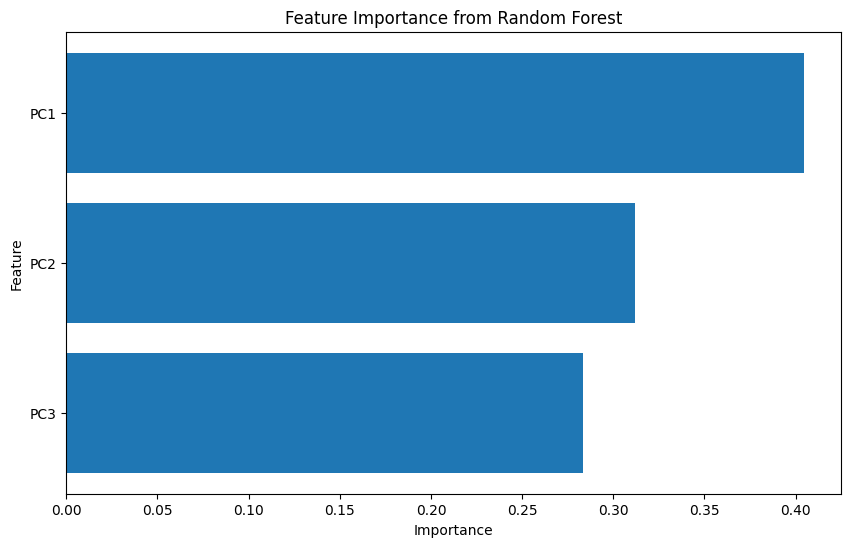

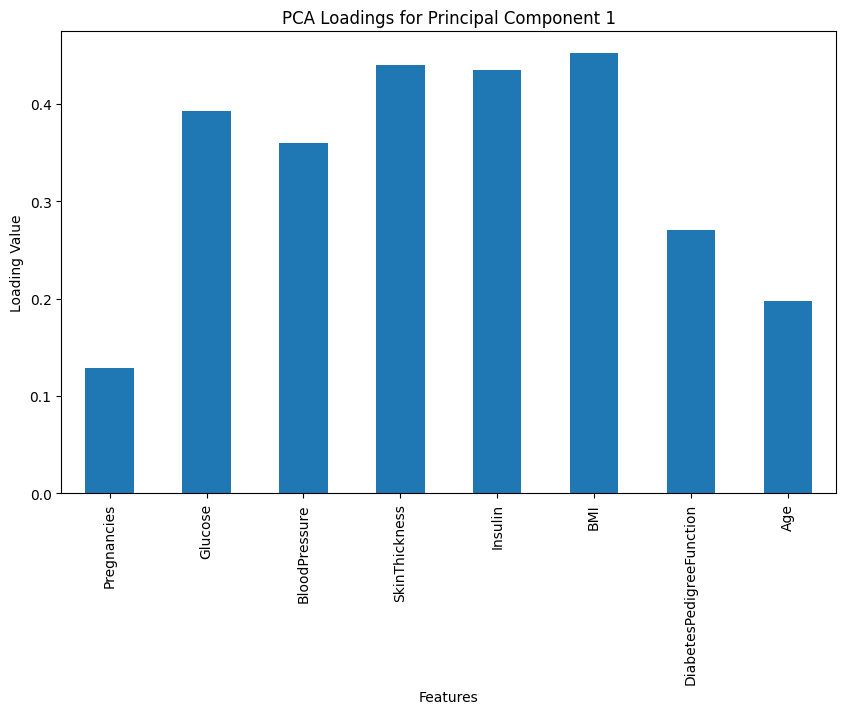

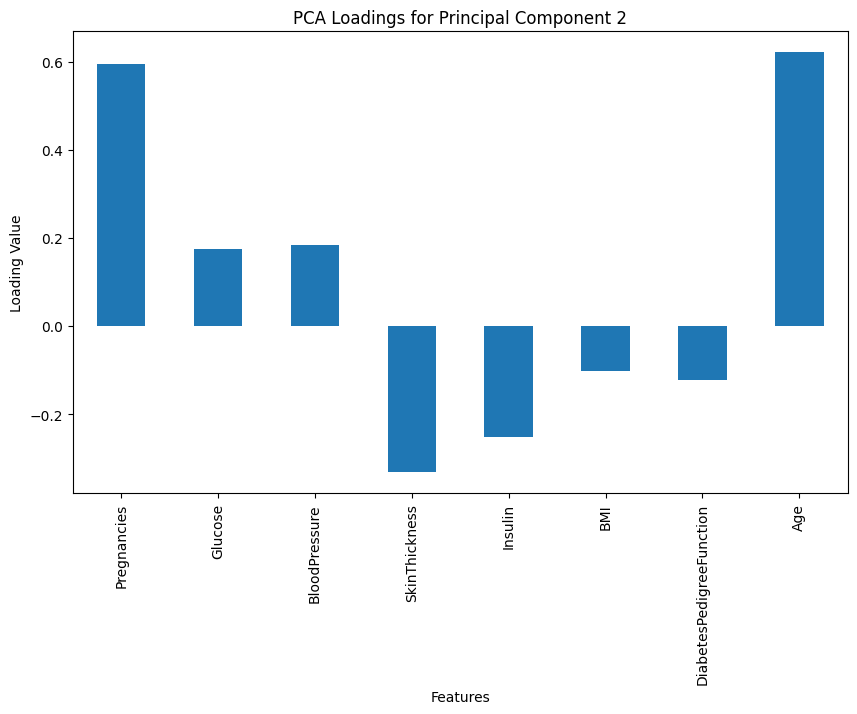

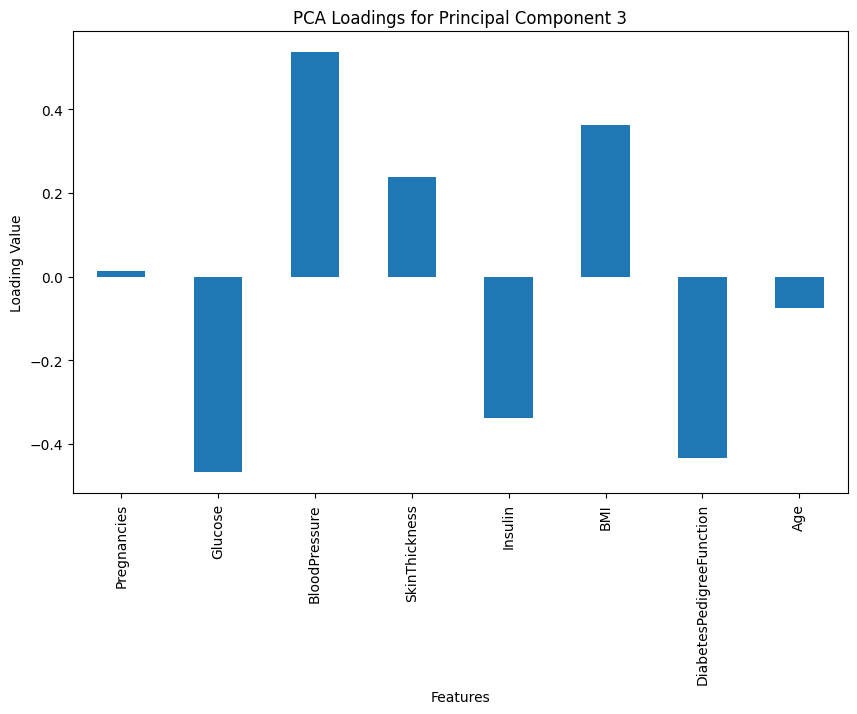

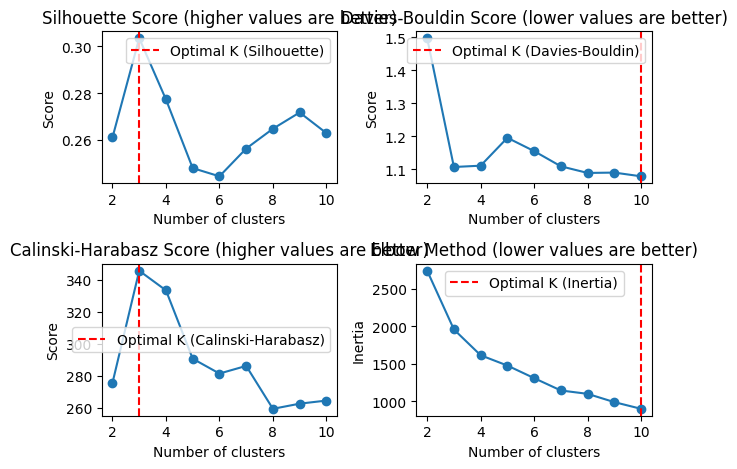

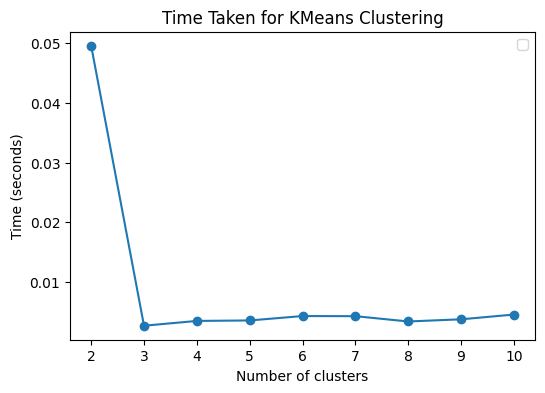

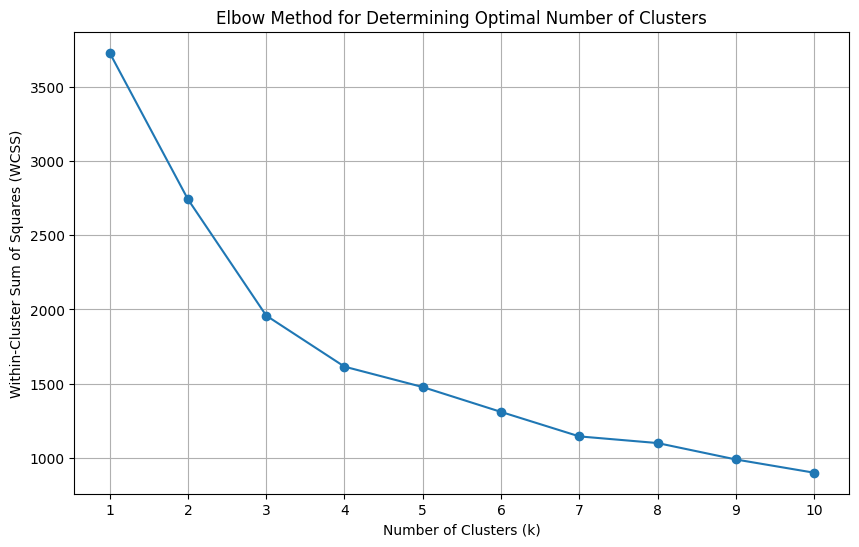

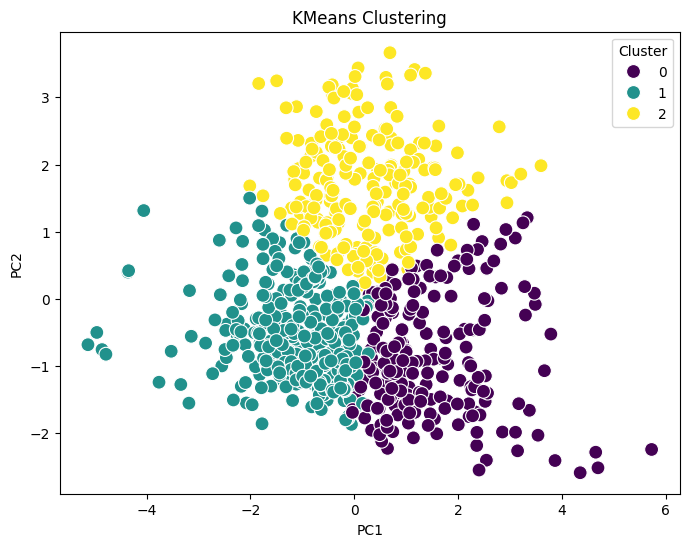

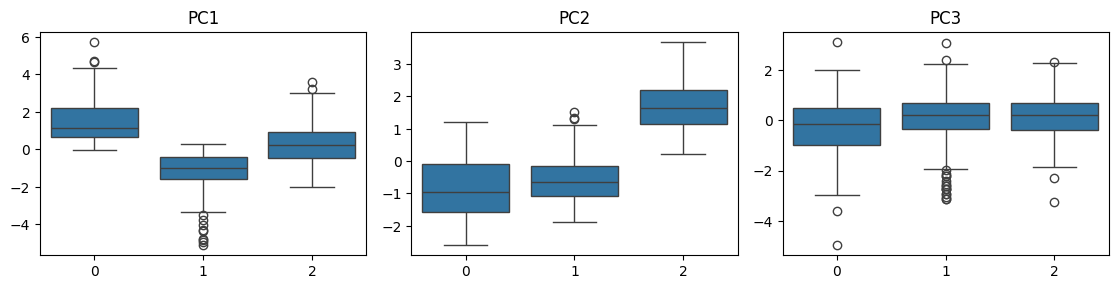

KMeans Average Silhouette Score for 2 clusters: 0.28
KMeans Average Silhouette Score for 3 clusters: 0.30
KMeans Average Silhouette Score for 4 clusters: 0.28
KMeans Average Silhouette Score for 5 clusters: 0.26
KMeans Average Silhouette Score for 6 clusters: 0.26
KMeans Average Silhouette Score for 7 clusters: 0.26
KMeans Average Silhouette Score for 8 clusters: 0.27


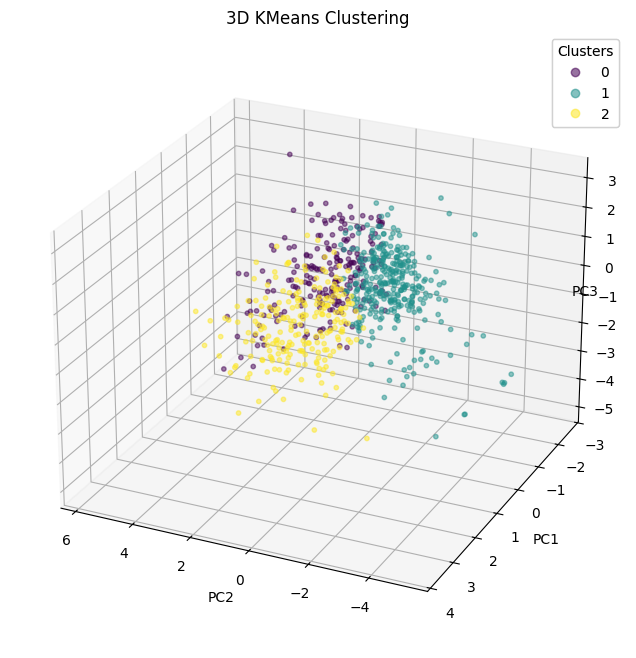

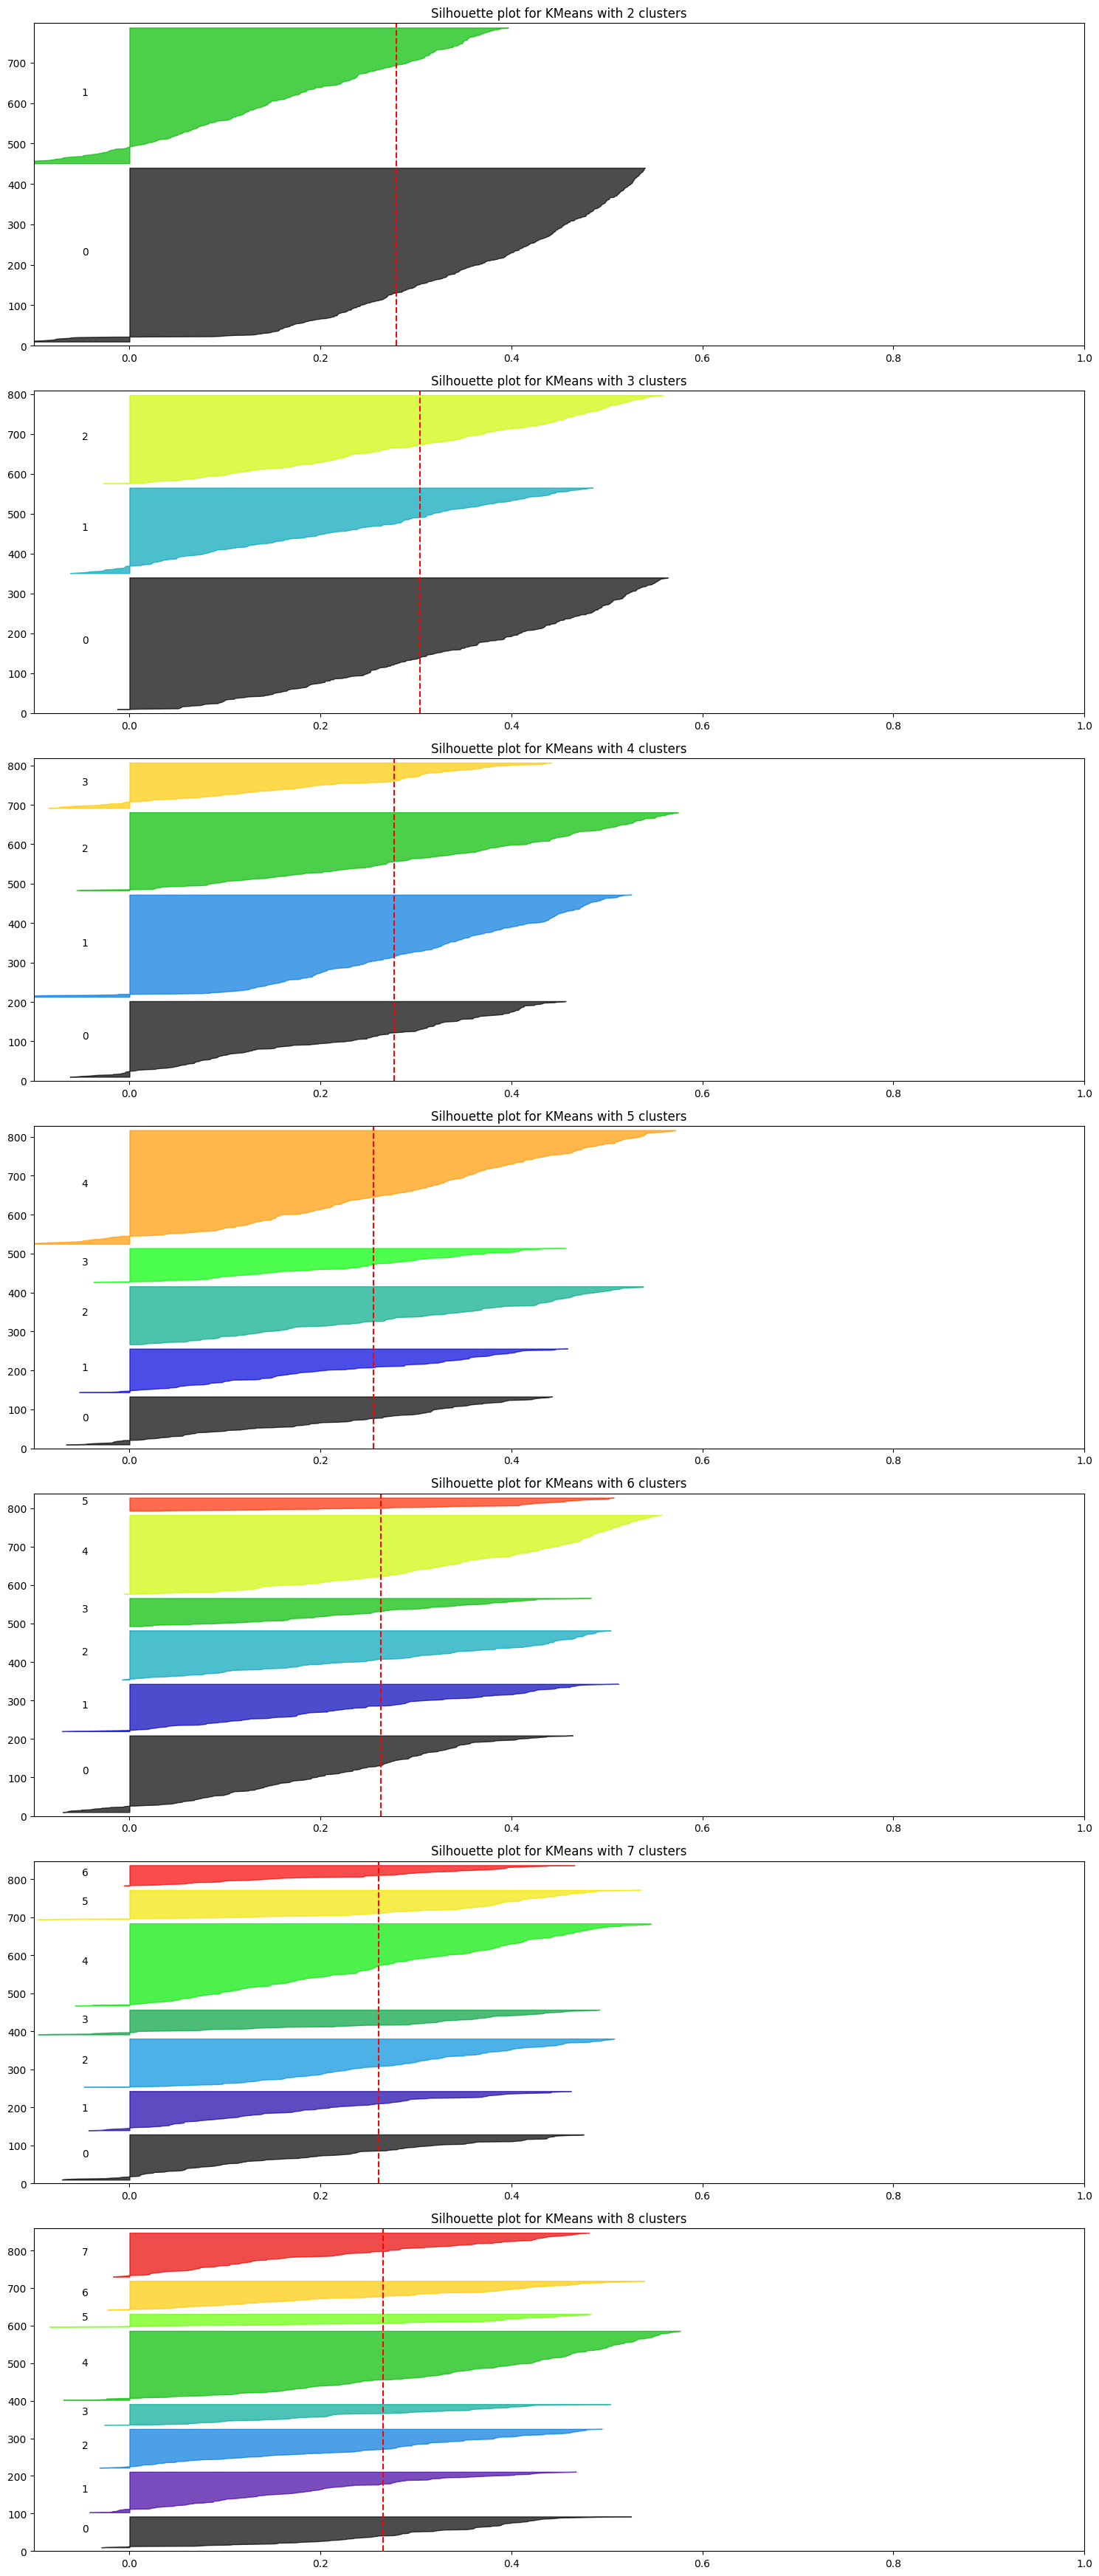

Number of Components: 2
BIC: 7392.634913424937
AIC: 7304.402908495131
Log Likelihood: -3633.2014542475654
Silhouette Score: 0.2571398447125444
------
Number of Components: 3
BIC: 7379.506465997869
AIC: 7244.836563736586
Log Likelihood: -3593.418281868293
Silhouette Score: 0.2684054347711715
------
Number of Components: 4
BIC: 7345.453114031095
AIC: 7164.345314438336
Log Likelihood: -3543.172657219168
Silhouette Score: 0.27208890652899204
------
Number of Components: 5
BIC: 7392.75285355044
AIC: 7165.207156626204
Log Likelihood: -3533.603578313102
Silhouette Score: 0.21421154945716858
------
Number of Components: 6
BIC: 7389.872479350484
AIC: 7115.8888850947715
Log Likelihood: -3498.9444425473857
Silhouette Score: 0.19287462700201238
------
Number of Components: 7
BIC: 7424.328166124438
AIC: 7103.906674537249
Log Likelihood: -3482.9533372686246
Silhouette Score: 0.2054205229983712
------
Number of Components: 8
BIC: 7475.326701359781
AIC: 7108.467312441115
Log Likelihood: -3475.23365622

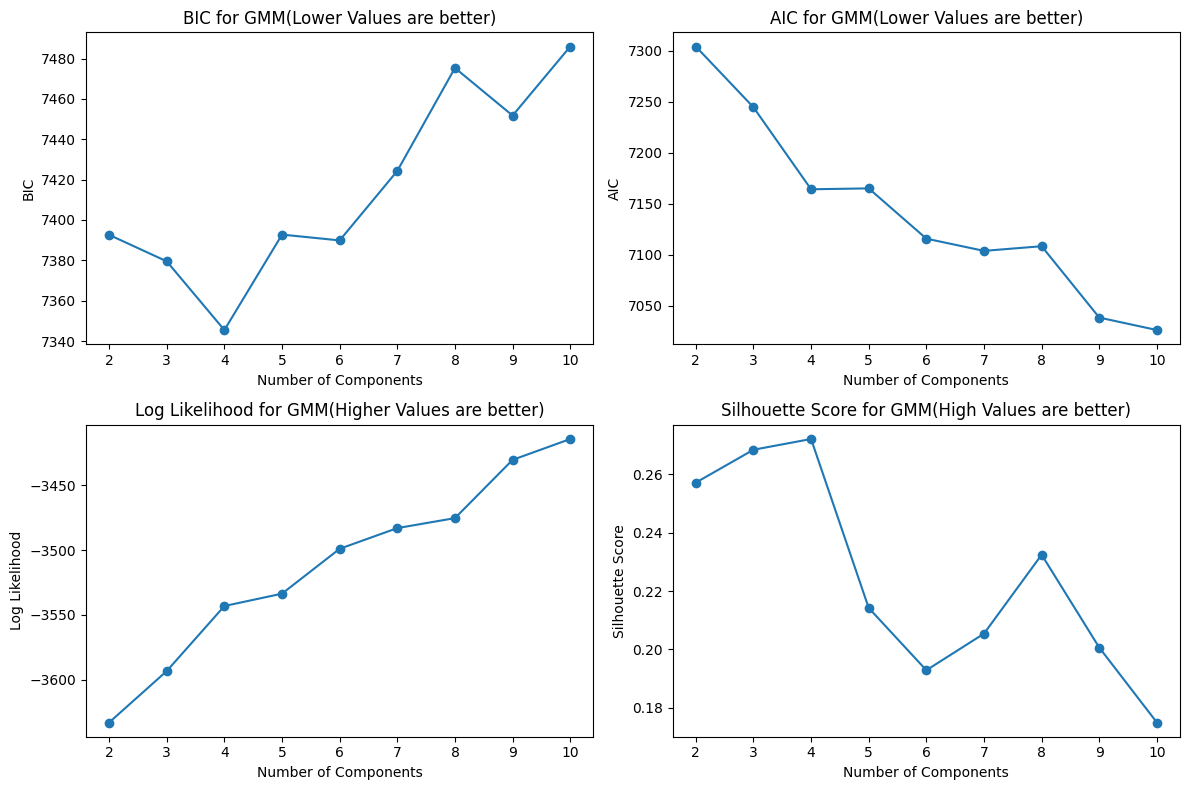

In [4]:
#diabetes Dataset
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 3
pca = PCA(n_components=n_components)
pca_X = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.1, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(n_components)],
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

loadings = pca.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(n_components)], index=X.columns)
# print(loadings_df)

for i in range(n_components):
    plt.figure(figsize=(10, 6))
    loadings_df[f'PC{i+1}'].plot(kind='bar')
    plt.title(f'PCA Loadings for Principal Component {i+1}')
    plt.ylabel('Loading Value')
    plt.xlabel('Features')
    plt.show()

X = diabetes.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = diabetes['Outcome']  # If needed

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 3
pca = PCA(n_components=n_components)
pca_X = pca.fit_transform(X_scaled)

# Calculate feature importance using RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(pca_X, y)
feature_importances = rf.feature_importances_

feature_names_sorted = []

feature_names = [f'PC{i+1}' for i in range(n_components)]
features_sorted = np.argsort(feature_importances)[::-1]
# feature_names_sorted = feature_names[features_sorted]

# Function to evaluate KMeans clustering
def evaluate_kmeans(X, max_clusters):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    inertias = []
    times = []

    for n_clusters in range(2, max_clusters + 1):
        start_time = time.time()
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        
        end_time = time.time()
        times.append(end_time - start_time)

        silhouette_scores.append(silhouette_score(X, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X, cluster_labels))
        inertias.append(kmeans.inertia_)

    return silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, inertias, times

# Set the maximum number of clusters to evaluate
max_clusters = 10
silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, inertias, times = evaluate_kmeans(pca_X, max_clusters)

#Determine the optimal number of clusters using individual metrics
optimal_clusters_silhouette = 2 + np.argmax(silhouette_scores)
optimal_clusters_davies_bouldin = 2 + np.argmin(davies_bouldin_scores)
optimal_clusters_calinski_harabasz = 2 + np.argmax(calinski_harabasz_scores)
optimal_clusters_inertia = 2 + np.argmin(inertias)

# Determine the optimal number of clusters using voting mechanism
scores = {
    'silhouette': np.argsort(silhouette_scores)[::-1],  # Higher is better
    'davies_bouldin': np.argsort(davies_bouldin_scores),  # Lower is better
    'calinski_harabasz': np.argsort(calinski_harabasz_scores)[::-1],  # Higher is better
    'inertia': np.argsort(inertias)  # Lower is better
}

# # votes = np.zeros(max_clusters - 1)
# # for key in scores:
# #     for rank, cluster_index in enumerate(scores[key]):
# #         votes[cluster_index] += rank

# # optimal_clusters_voting = votes.argmin() + 2  # Adjusting for the range starting at 2

# # Plot the evaluation metrics with optimal clusters for each individual metric
# plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.axvline(x=optimal_clusters_silhouette, color='r', linestyle='--', label='Optimal K (Silhouette)')
plt.title('Silhouette Score (higher values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.axvline(x=optimal_clusters_davies_bouldin, color='r', linestyle='--', label='Optimal K (Davies-Bouldin)')
plt.title('Davies-Bouldin Score (lower values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
plt.axvline(x=optimal_clusters_calinski_harabasz, color='r', linestyle='--', label='Optimal K (Calinski-Harabasz)')
plt.title('Calinski-Harabasz Score (higher values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.axvline(x=optimal_clusters_inertia, color='r', linestyle='--', label='Optimal K (Inertia)')
plt.title('Elbow Method (lower values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()

plt.tight_layout()
plt.show()




# Plot the evaluation metrics with the optimal clusters based on voting
# plt.figure(figsize=(20, 5))

# plt.subplot(1, 4, 1)
# plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
# #plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Silhouette Score (higher values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 2)
# plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Davies-Bouldin Score (lower values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 3)
# plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Calinski-Harabasz Score (higher values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 4)
# plt.plot(range(2, max_clusters + 1), inertias, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Elbow Method (lower values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Plot the time taken for each KMeans run
plt.figure(figsize=(6, 4))
plt.plot(range(2, max_clusters + 1), times, marker='o')
#plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
plt.title('Time Taken for KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

# Perform KMeans with the optimal number of clusters based on voting
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_X)



def calculate_wcss(X, k_values):
    wcss = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

k_values = range(1, 11)  # Example range of k values

# Calculate WCSS for the specified cluster sizes
wcss = calculate_wcss(pca_X, k_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot the clusters using the top two important features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_X[:, features_sorted[0]], y=pca_X[:, features_sorted[1]], hue=cluster_labels, palette='viridis', s=100)
plt.title('KMeans Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Knife plots for each feature
plt.figure(figsize=(15, 8))
for i in range(pca_X.shape[1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=cluster_labels, y=pca_X[:, i])
    plt.title(feature_names[i])
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=25, azim=115)
scatter = ax.scatter(pca_X[:, features_sorted[0]], pca_X[:, features_sorted[1]], pca_X[:, features_sorted[2]], c=cluster_labels, cmap='viridis', s=10, alpha=0.5)

ax.set_title('3D KMeans Clustering')
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[0])
ax.set_zlabel(feature_names[2], labelpad=-20)

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

def plot_silhouette(X, n_clusters_list, seeds):
    fig, axs = plt.subplots(len(n_clusters_list), 1, figsize=(15, 5 * len(n_clusters_list)))
    
    for i, n_clusters in enumerate(n_clusters_list):
        silhouette_avg = []
        sample_silhouette_values = []

        for seed in seeds:
            kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
            kmeans_labels = kmeans.fit_predict(X)
            silhouette_avg.append(silhouette_score(X, kmeans_labels))
            sample_silhouette_values.append(silhouette_samples(X, kmeans_labels))
        
        avg_silhouette_score = np.mean(silhouette_avg)
        sample_silhouette_values = np.concatenate(sample_silhouette_values)

        print(f"KMeans Average Silhouette Score for {n_clusters} clusters: {avg_silhouette_score:.2f}")

        ax = axs[i]
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        ax.set_title(f"Silhouette plot for KMeans with {n_clusters} clusters")

        y_lower = 10
        for j in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[np.where(kmeans_labels == j)]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(j) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            y_lower = y_upper + 10

        ax.axvline(x=avg_silhouette_score, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

# List of cluster sizes to evaluate
n_clusters_list = [2, 3, 4, 5, 6, 7, 8]
# List of random seeds
seeds = [0, 42, 100, 200, 300]

# Plot silhouette analysis for the specified cluster sizes
plot_silhouette(pca_X, n_clusters_list, seeds)


def evaluate_gmm(X, n_components_list):
    bic_scores = []
    aic_scores = []
    log_likelihoods = []
    silhouette_scores = []

    for n_components in n_components_list:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        labels = gmm.predict(X)
        
        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))
        log_likelihoods.append(gmm.score(X) * len(X))
        silhouette_scores.append(silhouette_score(X, labels))
        
        print(f"Number of Components: {n_components}")
        print(f"BIC: {bic_scores[-1]}")
        print(f"AIC: {aic_scores[-1]}")
        print(f"Log Likelihood: {log_likelihoods[-1]}")
        print(f"Silhouette Score: {silhouette_scores[-1]}")
        print("------")

    return bic_scores, aic_scores, log_likelihoods, silhouette_scores

# List of number of components to evaluate
n_components_list = range(2, 11)

# Evaluate GMM for the specified number of components
bic_scores, aic_scores, log_likelihoods, silhouette_scores = evaluate_gmm(pca_X, n_components_list)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(n_components_list, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC for GMM(Lower Values are better)')

plt.subplot(2, 2, 2)
plt.plot(n_components_list, aic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.title('AIC for GMM(Lower Values are better)')

plt.subplot(2, 2, 3)
plt.plot(n_components_list, log_likelihoods, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood for GMM(Higher Values are better)')

plt.subplot(2, 2, 4)
plt.plot(n_components_list, silhouette_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for GMM(High Values are better)')

plt.tight_layout()
plt.show()

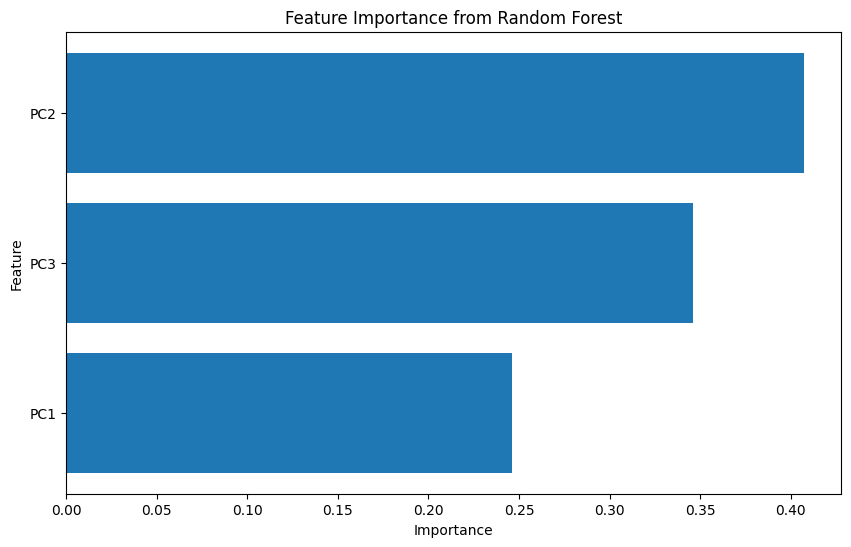

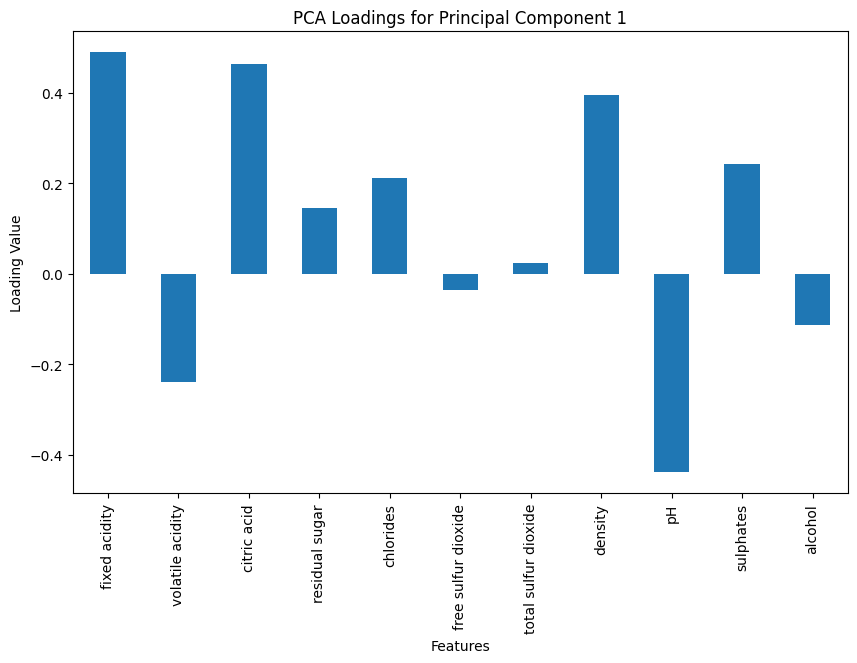

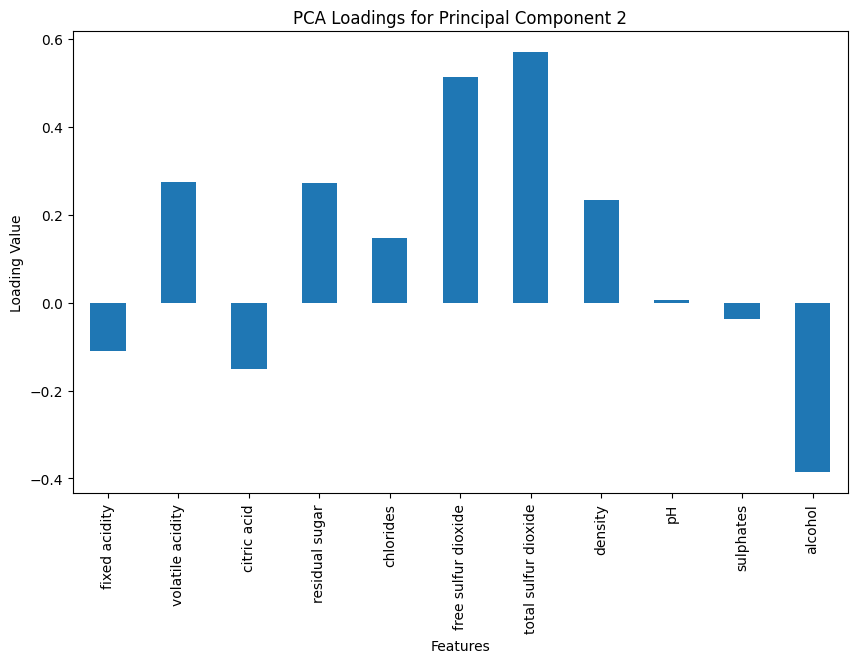

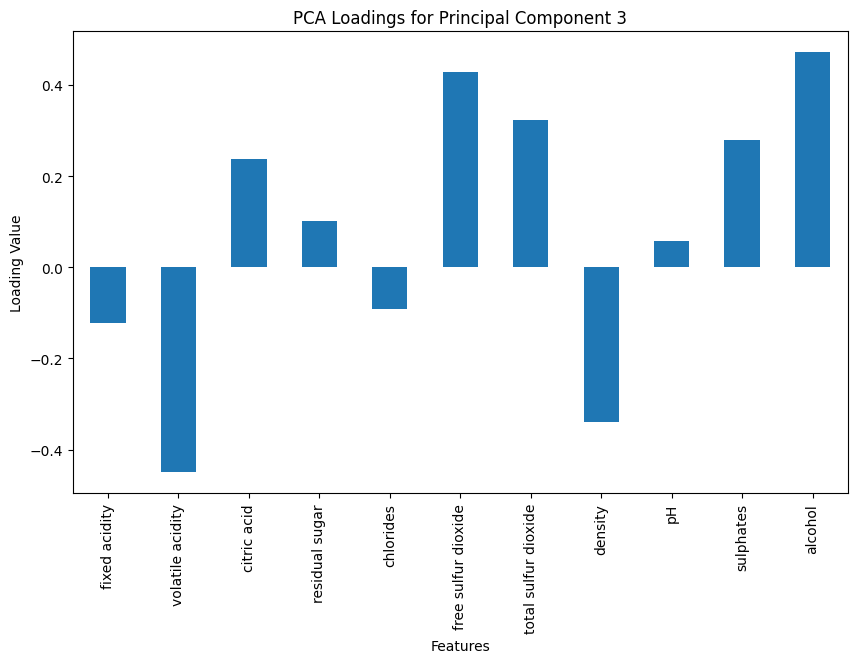

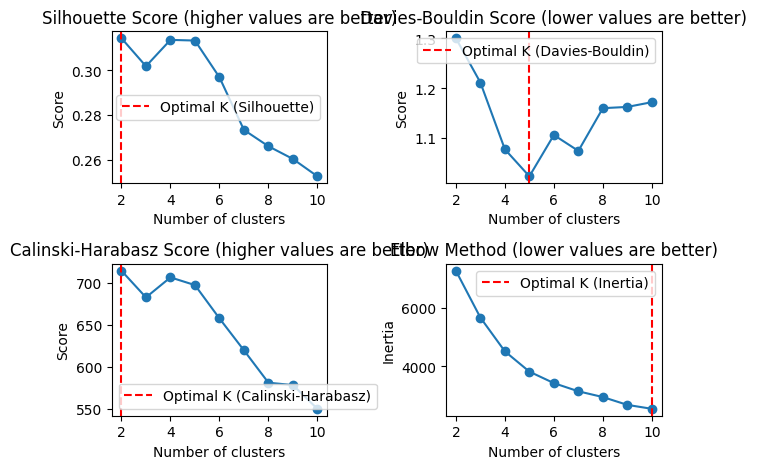

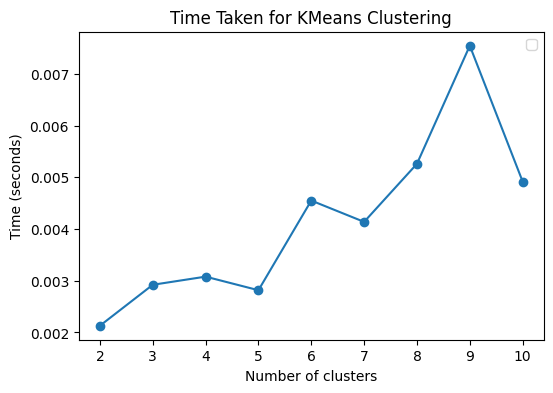

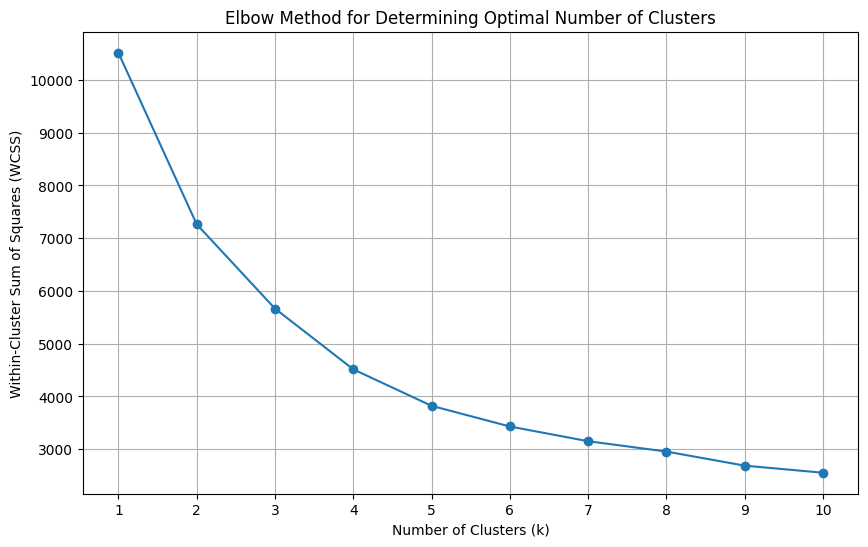

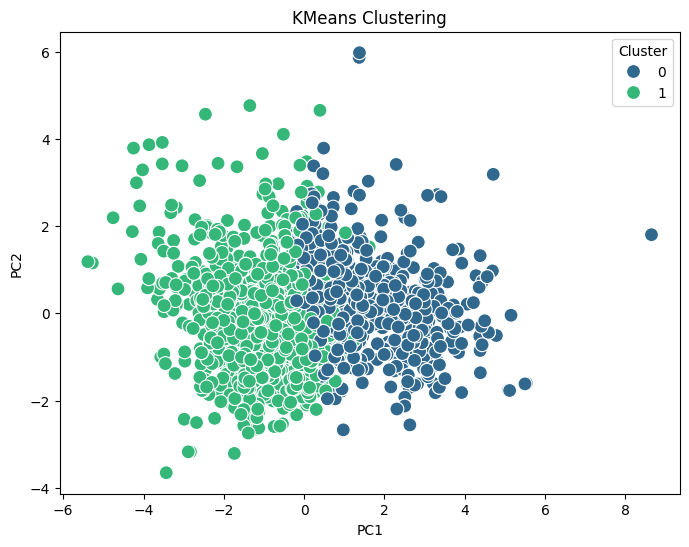

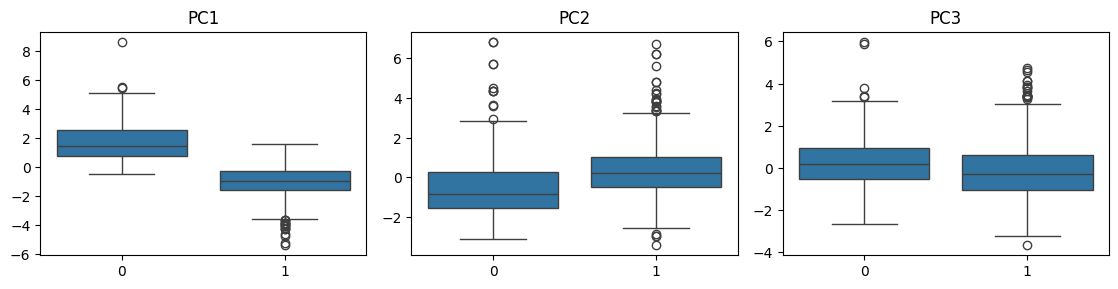

KMeans Average Silhouette Score for 2 clusters: 0.31
KMeans Average Silhouette Score for 3 clusters: 0.30
KMeans Average Silhouette Score for 4 clusters: 0.31
KMeans Average Silhouette Score for 5 clusters: 0.31
KMeans Average Silhouette Score for 6 clusters: 0.29
KMeans Average Silhouette Score for 7 clusters: 0.27
KMeans Average Silhouette Score for 8 clusters: 0.27


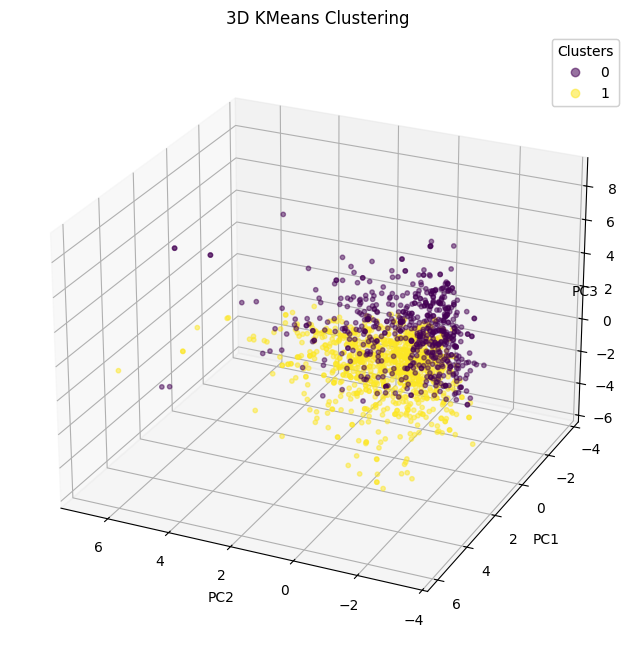

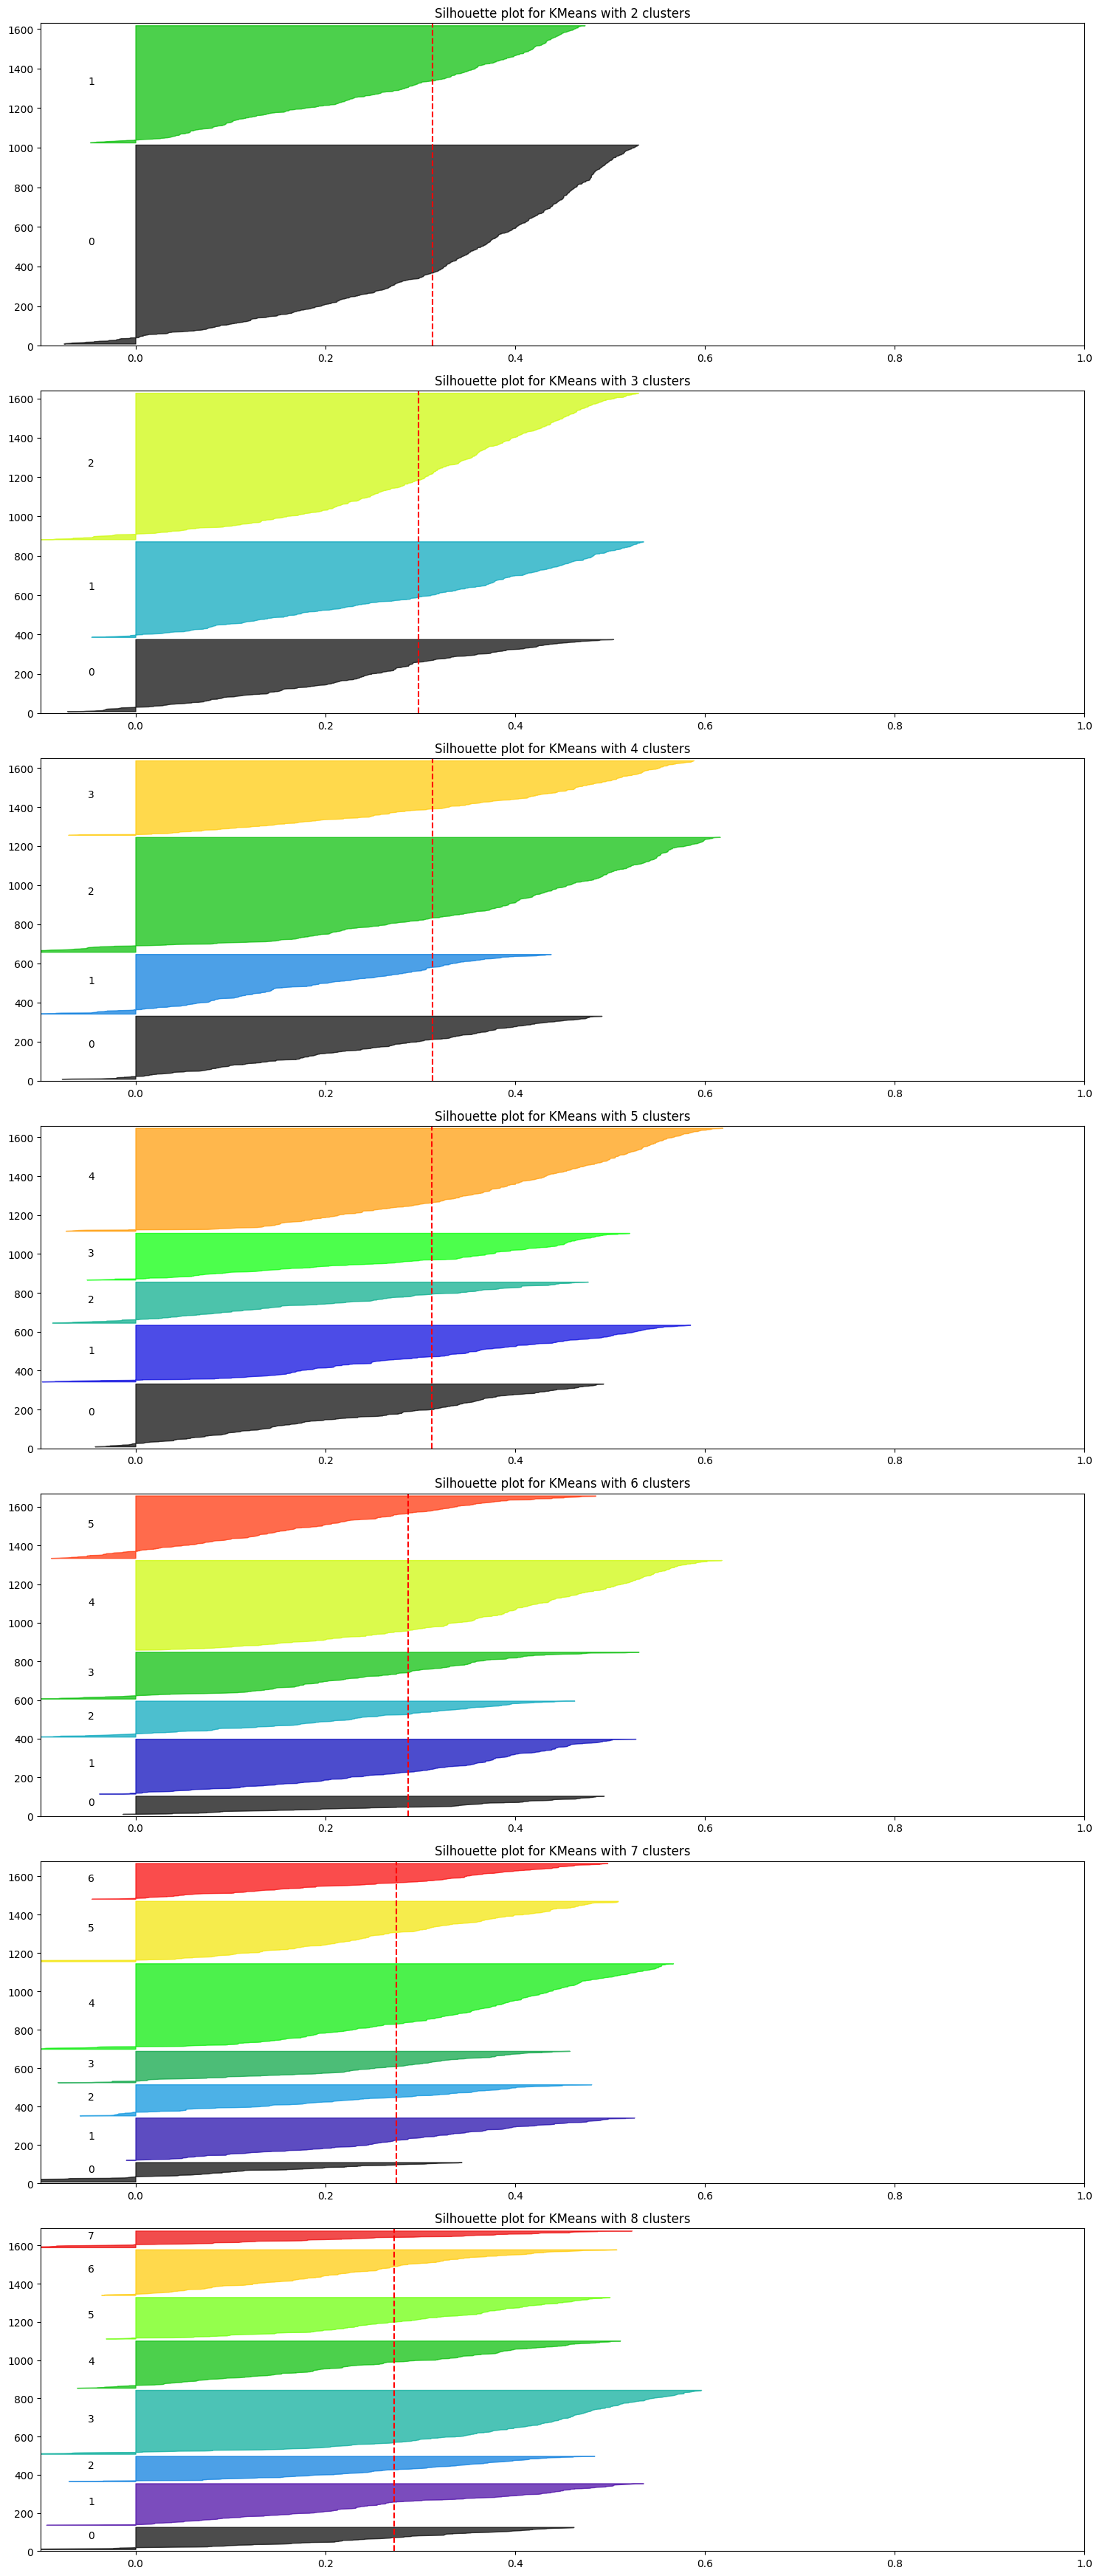

Number of Components: 2
BIC: 16856.999569094543
AIC: 16754.834028550697
Log Likelihood: -8358.417014275348
Silhouette Score: 0.3015611289562352
------
Number of Components: 3
BIC: 16526.846992664166
AIC: 16370.910114991982
Log Likelihood: -8156.455057495991
Silhouette Score: 0.2670400102547588
------
Number of Components: 4
BIC: 16545.758356147795
AIC: 16336.05014134727
Log Likelihood: -8129.025070673635
Silhouette Score: 0.2810794283122679
------
Number of Components: 5
BIC: 16548.670670400763
AIC: 16285.191118471897
Log Likelihood: -8093.595559235949
Silhouette Score: 0.22940054730893922
------
Number of Components: 6
BIC: 16525.241004123352
AIC: 16207.99011506615
Log Likelihood: -8044.995057533075
Silhouette Score: 0.2713403118747523
------
Number of Components: 7
BIC: 16528.464072932406
AIC: 16157.441846746862
Log Likelihood: -8009.720923373431
Silhouette Score: 0.19812912608895433
------
Number of Components: 8
BIC: 16612.298688809024
AIC: 16187.505125495141
Log Likelihood: -8014.

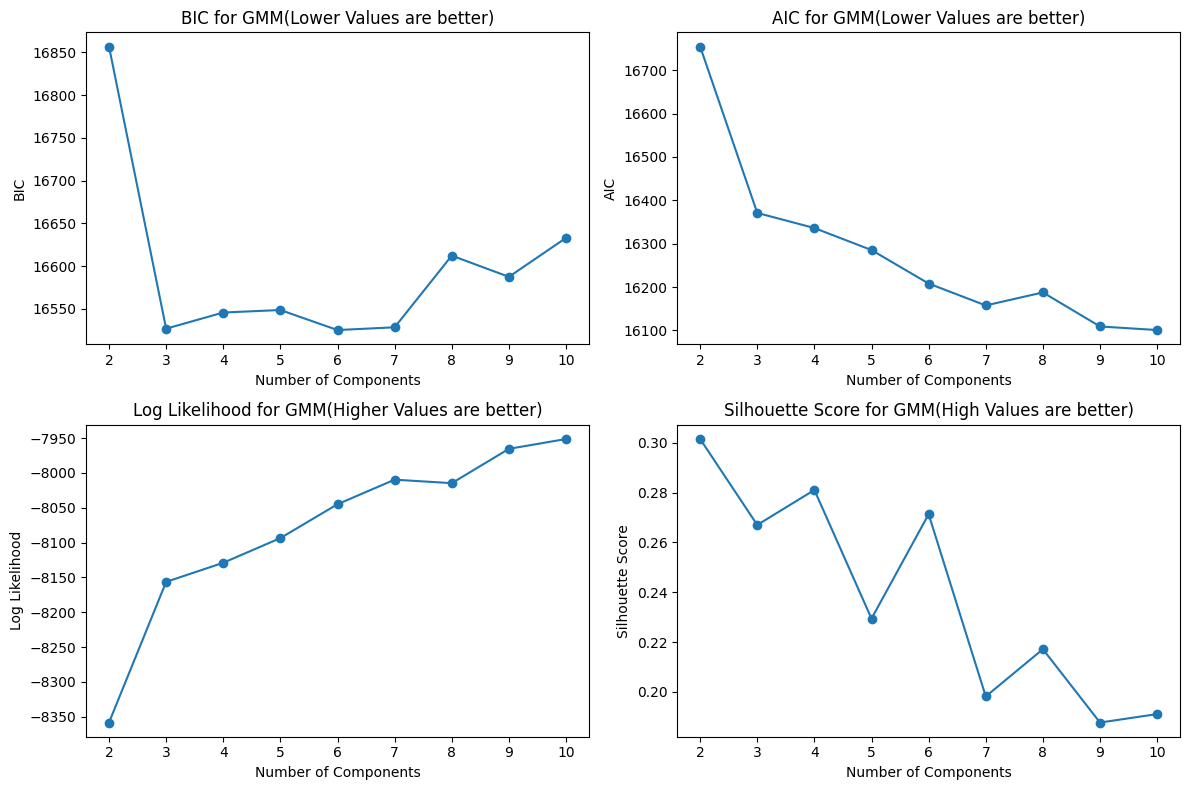

In [5]:
#diabetes Dataset
wine = pd.read_csv('winequality-red.csv')
wine.columns
wine['quality'] = wine['quality'].astype('category')
# scaler = StandardScaler()
# num_var =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#         'BMI', 'DiabetesPedigreeFunction', 'Age']
# diabetes[num_var] = scaler.fit_transform(diabetes[num_var])
cols = list(wine.columns)
cols.insert(0, cols.pop(cols.index('quality')))
wine = wine[cols]
X = wine.drop('quality', axis=1)
y = wine['quality']


X_scaled = scaler.fit_transform(X)

n_components = 3
pca = PCA(n_components=n_components)
pca_X = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.1, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(n_components)],
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

loadings = pca.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(n_components)], index=X.columns)
# print(loadings_df)

for i in range(n_components):
    plt.figure(figsize=(10, 6))
    loadings_df[f'PC{i+1}'].plot(kind='bar')
    plt.title(f'PCA Loadings for Principal Component {i+1}')
    plt.ylabel('Loading Value')
    plt.xlabel('Features')
    plt.show()

X = wine.drop('quality', axis=1)
y = wine['quality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 3
pca = PCA(n_components=n_components)
pca_X = pca.fit_transform(X_scaled)

# Calculate feature importance using RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(pca_X, y)
feature_importances = rf.feature_importances_

feature_names_sorted = []

feature_names = [f'PC{i+1}' for i in range(n_components)]
features_sorted = np.argsort(feature_importances)[::-1]
# feature_names_sorted = feature_names[features_sorted]

# Function to evaluate KMeans clustering
def evaluate_kmeans(X, max_clusters):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    inertias = []
    times = []

    for n_clusters in range(2, max_clusters + 1):
        start_time = time.time()
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        
        end_time = time.time()
        times.append(end_time - start_time)

        silhouette_scores.append(silhouette_score(X, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X, cluster_labels))
        inertias.append(kmeans.inertia_)

    return silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, inertias, times

# Set the maximum number of clusters to evaluate
max_clusters = 10
silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, inertias, times = evaluate_kmeans(pca_X, max_clusters)

#Determine the optimal number of clusters using individual metrics
optimal_clusters_silhouette = 2 + np.argmax(silhouette_scores)
optimal_clusters_davies_bouldin = 2 + np.argmin(davies_bouldin_scores)
optimal_clusters_calinski_harabasz = 2 + np.argmax(calinski_harabasz_scores)
optimal_clusters_inertia = 2 + np.argmin(inertias)

# Determine the optimal number of clusters using voting mechanism
scores = {
    'silhouette': np.argsort(silhouette_scores)[::-1],  # Higher is better
    'davies_bouldin': np.argsort(davies_bouldin_scores),  # Lower is better
    'calinski_harabasz': np.argsort(calinski_harabasz_scores)[::-1],  # Higher is better
    'inertia': np.argsort(inertias)  # Lower is better
}

# # votes = np.zeros(max_clusters - 1)
# # for key in scores:
# #     for rank, cluster_index in enumerate(scores[key]):
# #         votes[cluster_index] += rank

# # optimal_clusters_voting = votes.argmin() + 2  # Adjusting for the range starting at 2

# # Plot the evaluation metrics with optimal clusters for each individual metric
# plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.axvline(x=optimal_clusters_silhouette, color='r', linestyle='--', label='Optimal K (Silhouette)')
plt.title('Silhouette Score (higher values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.axvline(x=optimal_clusters_davies_bouldin, color='r', linestyle='--', label='Optimal K (Davies-Bouldin)')
plt.title('Davies-Bouldin Score (lower values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
plt.axvline(x=optimal_clusters_calinski_harabasz, color='r', linestyle='--', label='Optimal K (Calinski-Harabasz)')
plt.title('Calinski-Harabasz Score (higher values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.axvline(x=optimal_clusters_inertia, color='r', linestyle='--', label='Optimal K (Inertia)')
plt.title('Elbow Method (lower values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()

plt.tight_layout()
plt.show()




# Plot the evaluation metrics with the optimal clusters based on voting
# plt.figure(figsize=(20, 5))

# plt.subplot(1, 4, 1)
# plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
# #plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Silhouette Score (higher values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 2)
# plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Davies-Bouldin Score (lower values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 3)
# plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Calinski-Harabasz Score (higher values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 4)
# plt.plot(range(2, max_clusters + 1), inertias, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Elbow Method (lower values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Plot the time taken for each KMeans run
plt.figure(figsize=(6, 4))
plt.plot(range(2, max_clusters + 1), times, marker='o')
#plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
plt.title('Time Taken for KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

# Perform KMeans with the optimal number of clusters based on voting
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(pca_X)



def calculate_wcss(X, k_values):
    wcss = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

k_values = range(1, 11)  # Example range of k values

# Calculate WCSS for the specified cluster sizes
wcss = calculate_wcss(pca_X, k_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot the clusters using the top two important features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_X[:, features_sorted[2]], y=pca_X[:, features_sorted[1]], hue=cluster_labels, palette='viridis', s=100)
plt.title('KMeans Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Knife plots for each feature
plt.figure(figsize=(15, 8))
for i in range(pca_X.shape[1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=cluster_labels, y=pca_X[:, i])
    plt.title(feature_names[i])
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=25, azim=115)
scatter = ax.scatter(pca_X[:, features_sorted[0]], pca_X[:, features_sorted[1]], pca_X[:, features_sorted[2]], c=cluster_labels, cmap='viridis', s=10, alpha=0.5)

ax.set_title('3D KMeans Clustering')
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[0])
ax.set_zlabel(feature_names[2], labelpad=-20)

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

def plot_silhouette(X, n_clusters_list, seeds):
    fig, axs = plt.subplots(len(n_clusters_list), 1, figsize=(15, 5 * len(n_clusters_list)))
    
    for i, n_clusters in enumerate(n_clusters_list):
        silhouette_avg = []
        sample_silhouette_values = []

        for seed in seeds:
            kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
            kmeans_labels = kmeans.fit_predict(X)
            silhouette_avg.append(silhouette_score(X, kmeans_labels))
            sample_silhouette_values.append(silhouette_samples(X, kmeans_labels))
        
        avg_silhouette_score = np.mean(silhouette_avg)
        sample_silhouette_values = np.concatenate(sample_silhouette_values)

        print(f"KMeans Average Silhouette Score for {n_clusters} clusters: {avg_silhouette_score:.2f}")

        ax = axs[i]
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        ax.set_title(f"Silhouette plot for KMeans with {n_clusters} clusters")

        y_lower = 10
        for j in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[np.where(kmeans_labels == j)]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(j) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            y_lower = y_upper + 10

        ax.axvline(x=avg_silhouette_score, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

# List of cluster sizes to evaluate
n_clusters_list = [2, 3, 4, 5, 6, 7, 8]
# List of random seeds
seeds = [0, 42, 100, 200, 300]

# Plot silhouette analysis for the specified cluster sizes
plot_silhouette(pca_X, n_clusters_list, seeds)


def evaluate_gmm(X, n_components_list):
    bic_scores = []
    aic_scores = []
    log_likelihoods = []
    silhouette_scores = []

    for n_components in n_components_list:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        labels = gmm.predict(X)
        
        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))
        log_likelihoods.append(gmm.score(X) * len(X))
        silhouette_scores.append(silhouette_score(X, labels))
        
        print(f"Number of Components: {n_components}")
        print(f"BIC: {bic_scores[-1]}")
        print(f"AIC: {aic_scores[-1]}")
        print(f"Log Likelihood: {log_likelihoods[-1]}")
        print(f"Silhouette Score: {silhouette_scores[-1]}")
        print("------")

    return bic_scores, aic_scores, log_likelihoods, silhouette_scores

# List of number of components to evaluate
n_components_list = range(2, 11)

# Evaluate GMM for the specified number of components
bic_scores, aic_scores, log_likelihoods, silhouette_scores = evaluate_gmm(pca_X, n_components_list)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(n_components_list, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC for GMM(Lower Values are better)')

plt.subplot(2, 2, 2)
plt.plot(n_components_list, aic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.title('AIC for GMM(Lower Values are better)')

plt.subplot(2, 2, 3)
plt.plot(n_components_list, log_likelihoods, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood for GMM(Higher Values are better)')

plt.subplot(2, 2, 4)
plt.plot(n_components_list, silhouette_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for GMM(High Values are better)')

plt.tight_layout()
plt.show()

RP

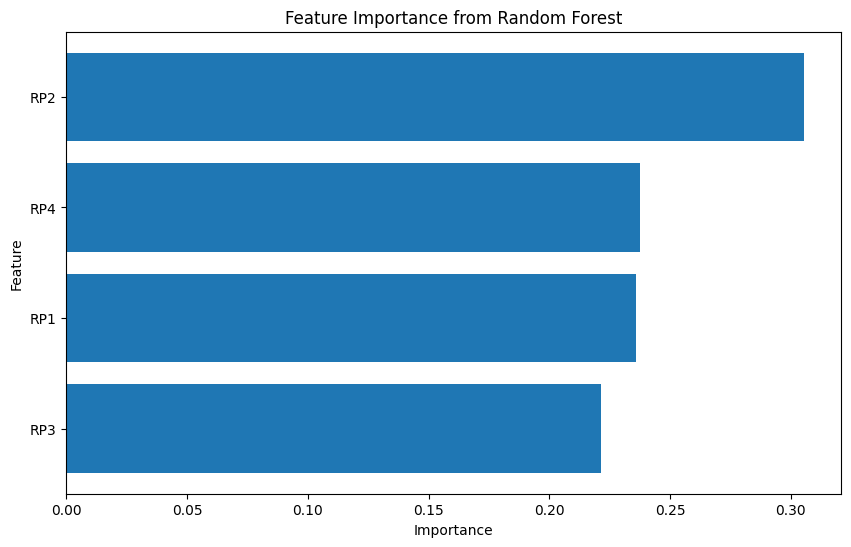

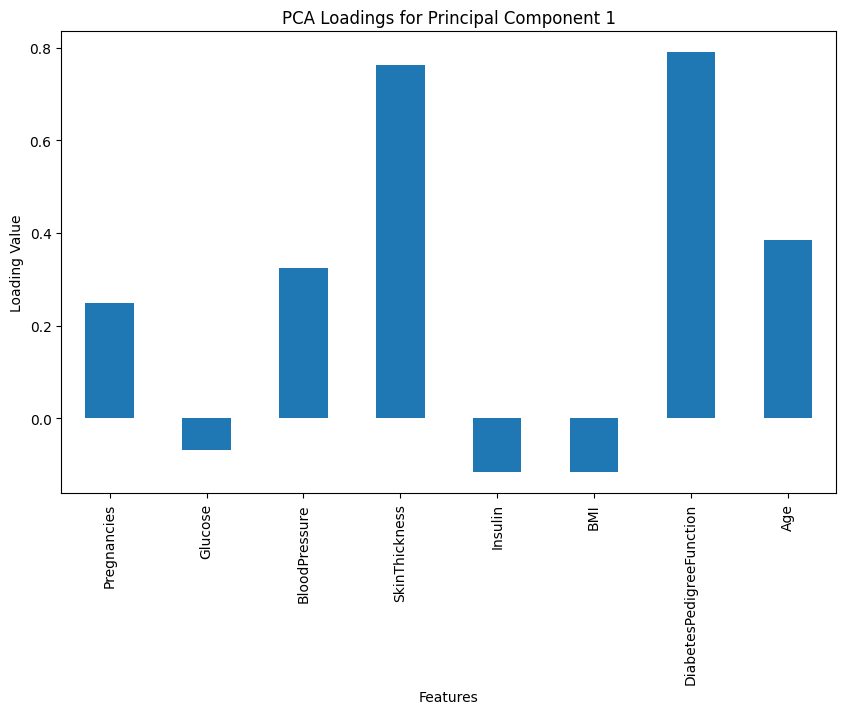

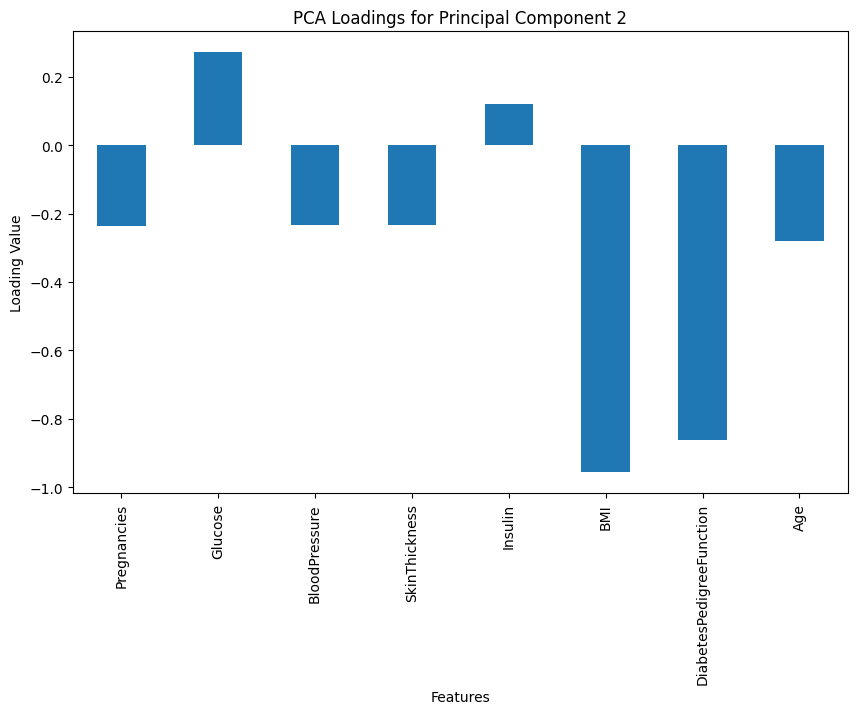

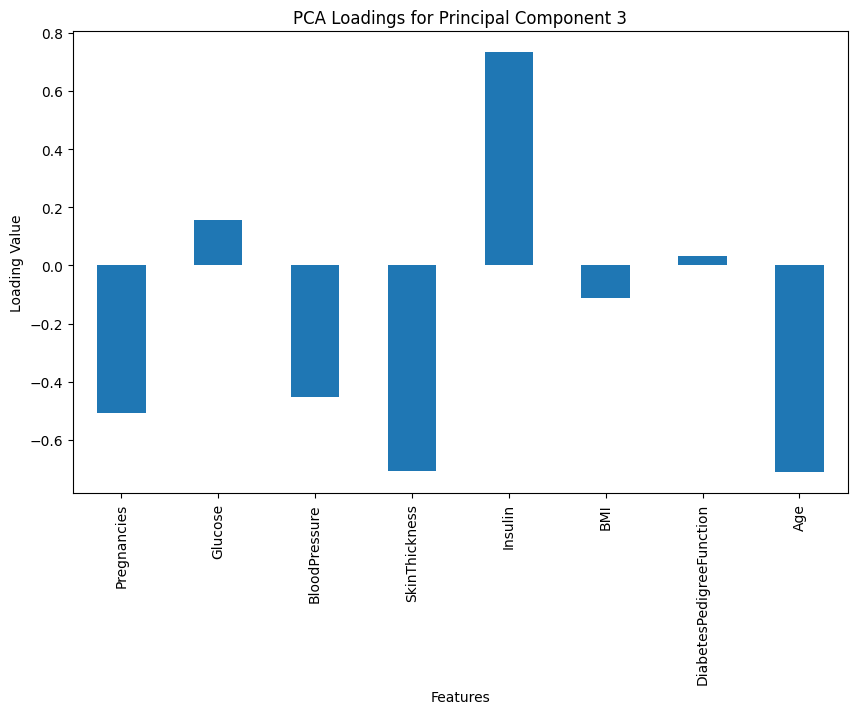

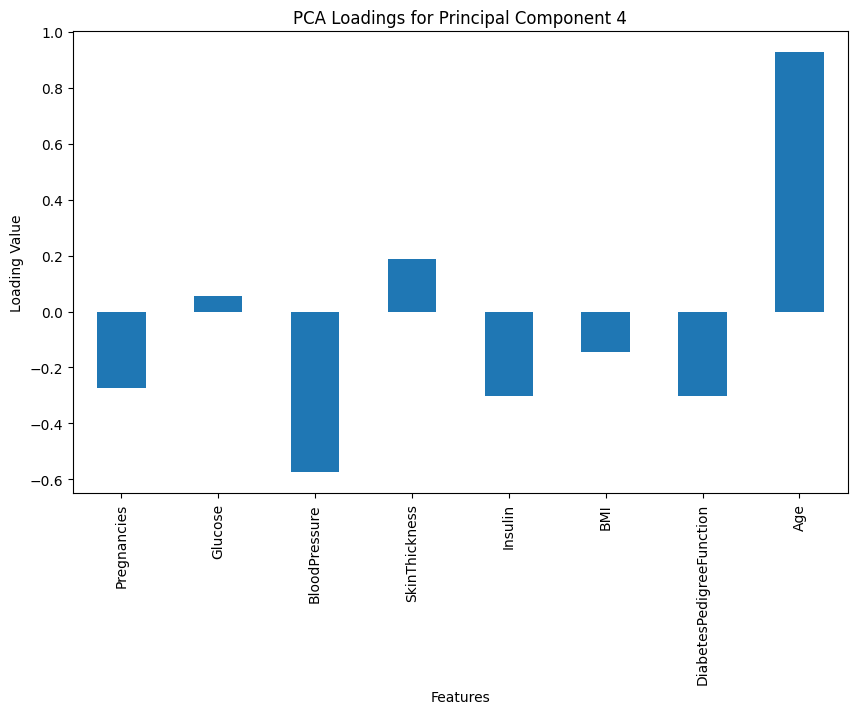

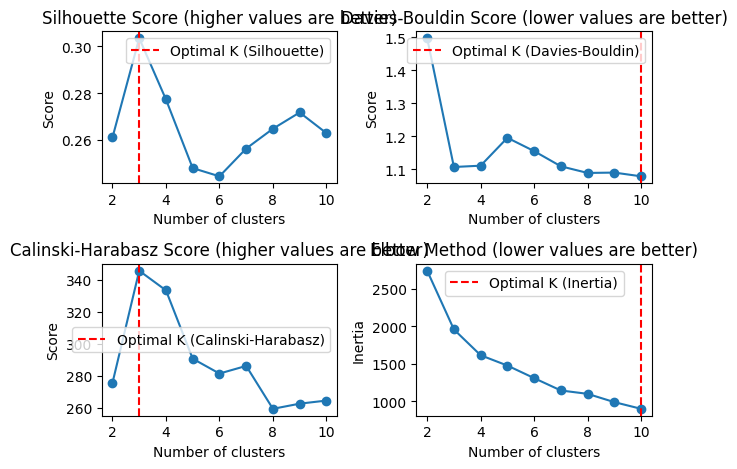

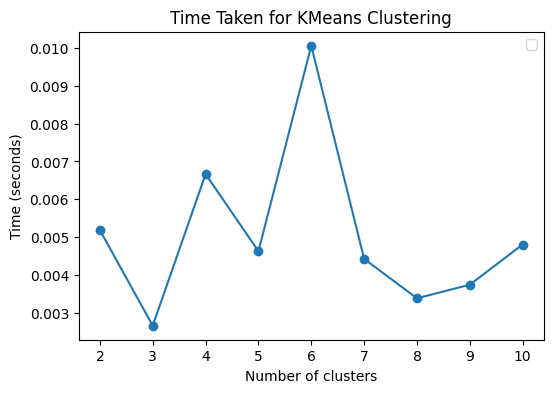

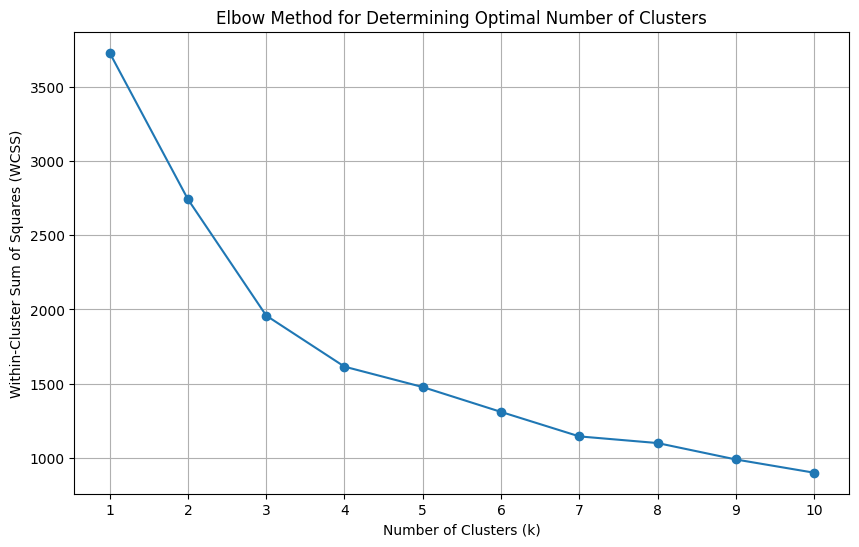

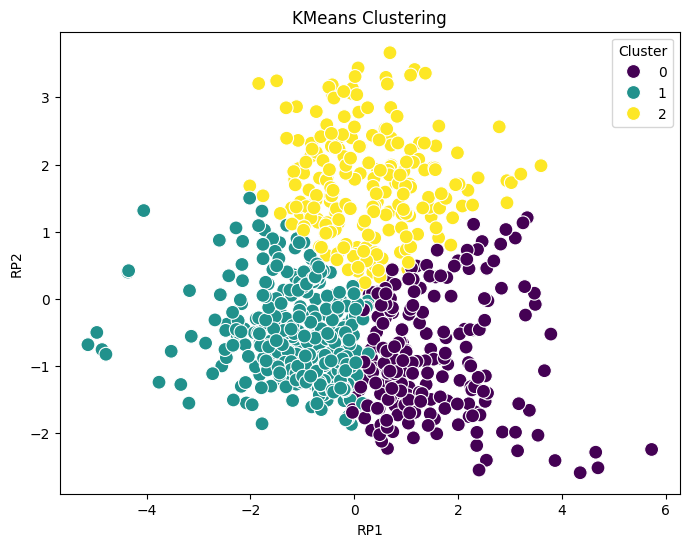

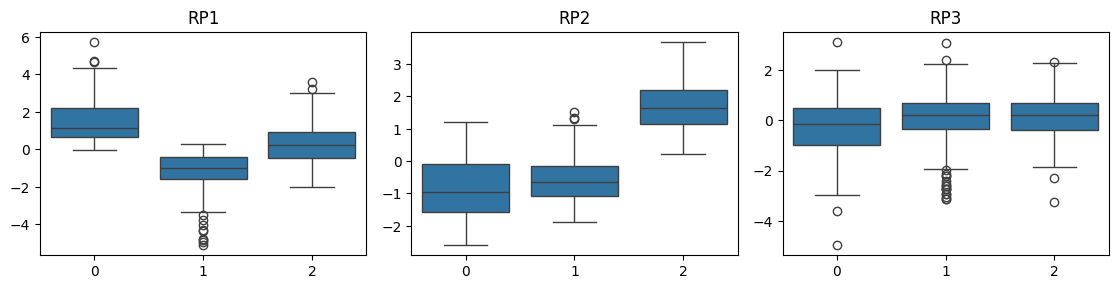

KMeans Average Silhouette Score for 2 clusters: 0.28
KMeans Average Silhouette Score for 3 clusters: 0.30
KMeans Average Silhouette Score for 4 clusters: 0.28
KMeans Average Silhouette Score for 5 clusters: 0.26
KMeans Average Silhouette Score for 6 clusters: 0.26
KMeans Average Silhouette Score for 7 clusters: 0.26
KMeans Average Silhouette Score for 8 clusters: 0.27


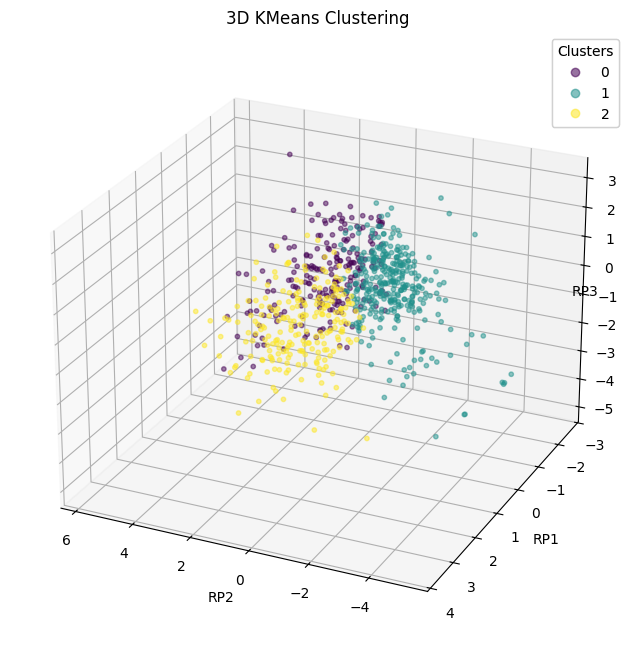

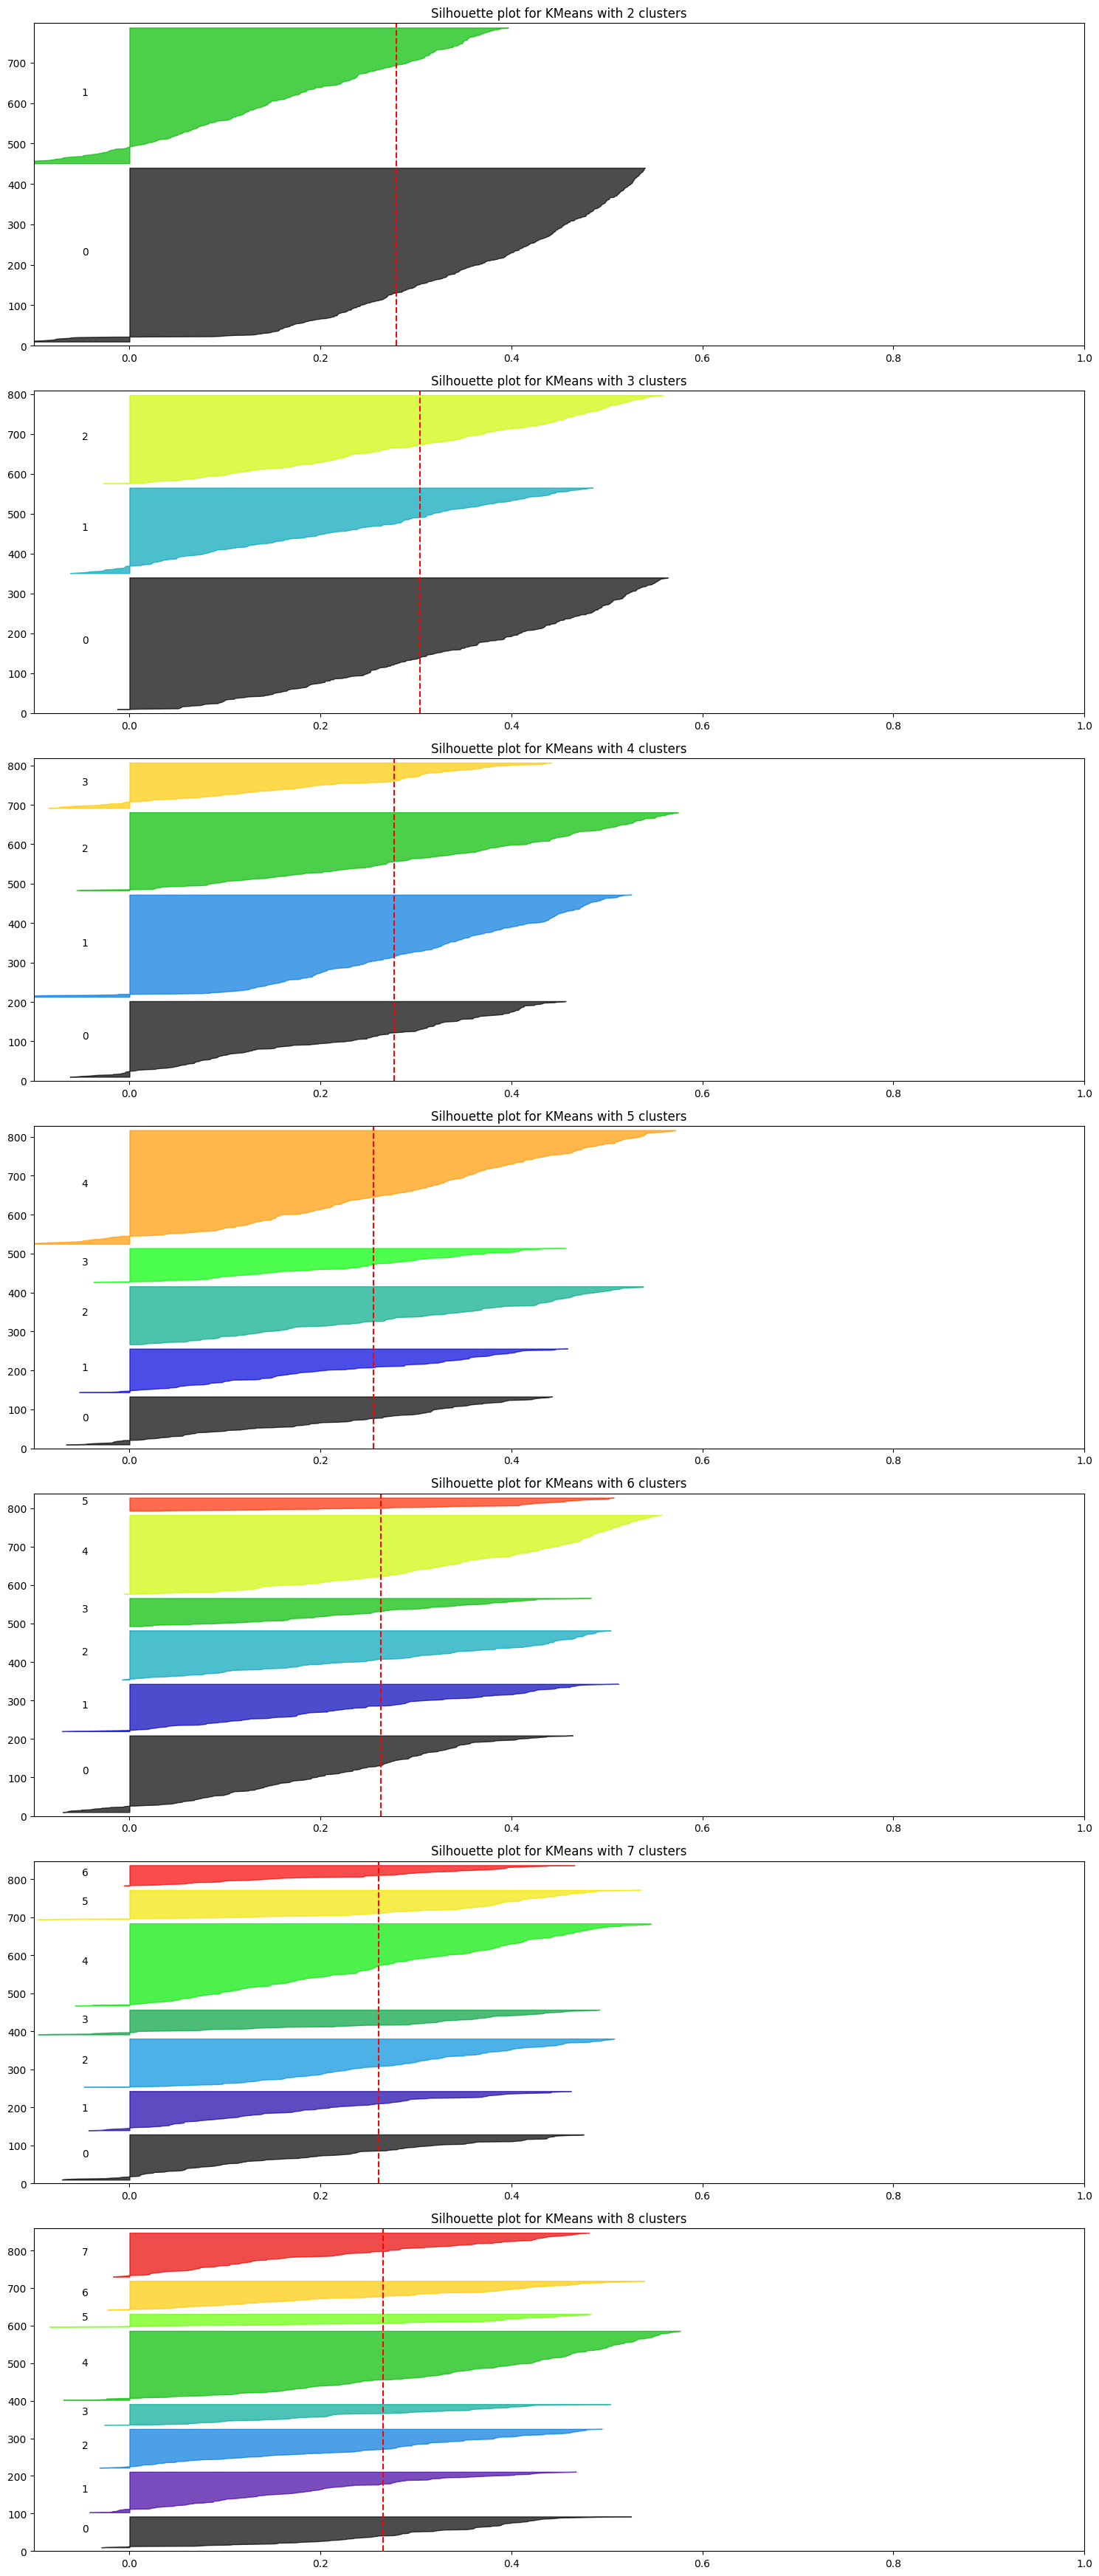

Number of Components: 2
BIC: 7392.634913424937
AIC: 7304.402908495131
Log Likelihood: -3633.2014542475654
Silhouette Score: 0.2571398447125444
------
Number of Components: 3
BIC: 7379.506465997869
AIC: 7244.836563736586
Log Likelihood: -3593.418281868293
Silhouette Score: 0.2684054347711715
------
Number of Components: 4
BIC: 7345.453114031095
AIC: 7164.345314438336
Log Likelihood: -3543.172657219168
Silhouette Score: 0.27208890652899204
------
Number of Components: 5
BIC: 7392.75285355044
AIC: 7165.207156626204
Log Likelihood: -3533.603578313102
Silhouette Score: 0.21421154945716858
------
Number of Components: 6
BIC: 7389.872479350484
AIC: 7115.8888850947715
Log Likelihood: -3498.9444425473857
Silhouette Score: 0.19287462700201238
------
Number of Components: 7
BIC: 7424.328166124438
AIC: 7103.906674537249
Log Likelihood: -3482.9533372686246
Silhouette Score: 0.2054205229983712
------
Number of Components: 8
BIC: 7475.326701359781
AIC: 7108.467312441115
Log Likelihood: -3475.23365622

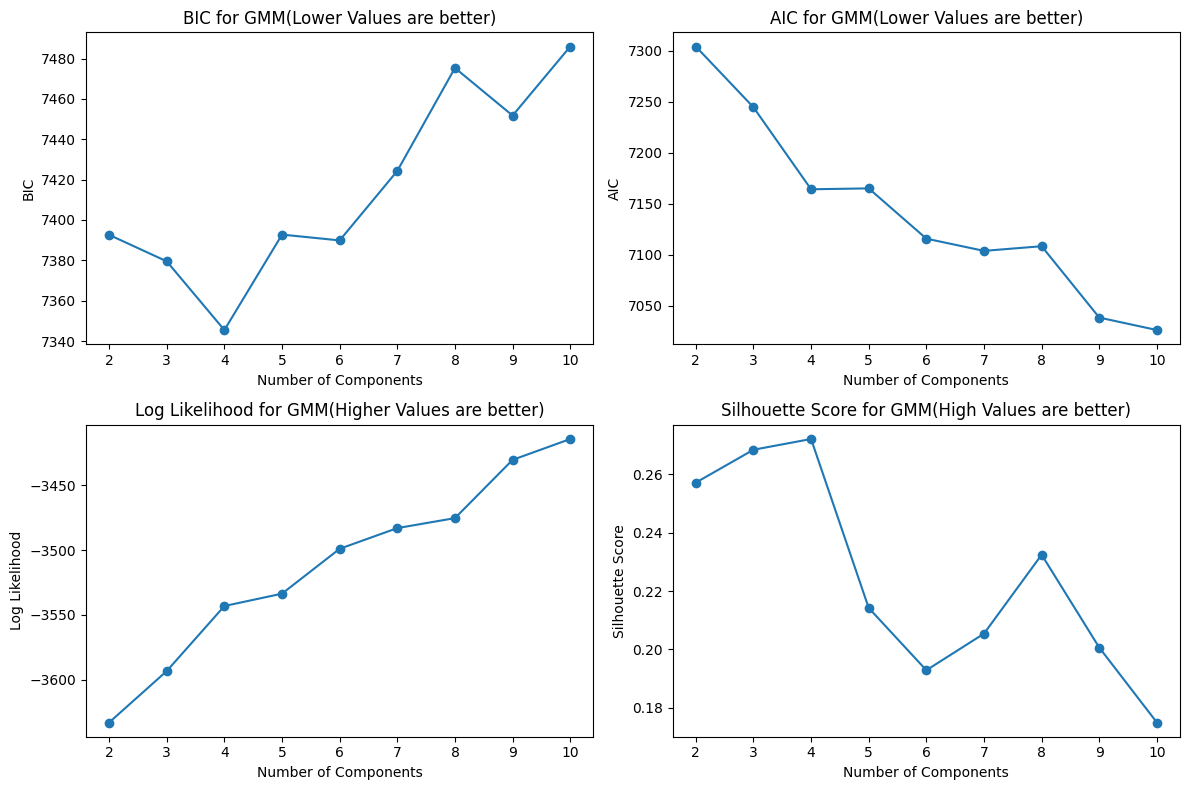

In [6]:
#diabetes Dataset
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 4
rp = GaussianRandomProjection(n_components=n_components, random_state=42)
rp_X = rp.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rp_X, y, test_size=0.1, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': [f'RP{i+1}' for i in range(n_components)],
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

loadings = rp.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings.T, columns=[f'RP{i+1}' for i in range(n_components)], index=X.columns)
# print(loadings_df)

for i in range(n_components):
    plt.figure(figsize=(10, 6))
    loadings_df[f'PC{i+1}'].plot(kind='bar')
    plt.title(f' Loadings for RP {i+1}')
    plt.ylabel('Loading Value')
    plt.xlabel('Features')
    plt.show()

X = diabetes.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = diabetes['Outcome']  # If needed

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 4
rp = GaussianRandomProjection(n_components=n_components, random_state=42)
rp_X = pca.fit_transform(X_scaled)

# Calculate feature importance using RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(rp_X, y)
feature_importances = rf.feature_importances_

feature_names_sorted = []

feature_names = [f'RP{i+1}' for i in range(n_components)]
features_sorted = np.argsort(feature_importances)[::-1]
# feature_names_sorted = feature_names[features_sorted]

# Function to evaluate KMeans clustering
def evaluate_kmeans(X, max_clusters):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    inertias = []
    times = []

    for n_clusters in range(2, max_clusters + 1):
        start_time = time.time()
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        
        end_time = time.time()
        times.append(end_time - start_time)

        silhouette_scores.append(silhouette_score(X, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X, cluster_labels))
        inertias.append(kmeans.inertia_)

    return silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, inertias, times

# Set the maximum number of clusters to evaluate
max_clusters = 10
silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, inertias, times = evaluate_kmeans(rp_X, max_clusters)

#Determine the optimal number of clusters using individual metrics
optimal_clusters_silhouette = 2 + np.argmax(silhouette_scores)
optimal_clusters_davies_bouldin = 2 + np.argmin(davies_bouldin_scores)
optimal_clusters_calinski_harabasz = 2 + np.argmax(calinski_harabasz_scores)
optimal_clusters_inertia = 2 + np.argmin(inertias)

# Determine the optimal number of clusters using voting mechanism
scores = {
    'silhouette': np.argsort(silhouette_scores)[::-1],  # Higher is better
    'davies_bouldin': np.argsort(davies_bouldin_scores),  # Lower is better
    'calinski_harabasz': np.argsort(calinski_harabasz_scores)[::-1],  # Higher is better
    'inertia': np.argsort(inertias)  # Lower is better
}

# # votes = np.zeros(max_clusters - 1)
# # for key in scores:
# #     for rank, cluster_index in enumerate(scores[key]):
# #         votes[cluster_index] += rank

# # optimal_clusters_voting = votes.argmin() + 2  # Adjusting for the range starting at 2

# # Plot the evaluation metrics with optimal clusters for each individual metric
# plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.axvline(x=optimal_clusters_silhouette, color='r', linestyle='--', label='Optimal K (Silhouette)')
plt.title('Silhouette Score (higher values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.axvline(x=optimal_clusters_davies_bouldin, color='r', linestyle='--', label='Optimal K (Davies-Bouldin)')
plt.title('Davies-Bouldin Score (lower values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
plt.axvline(x=optimal_clusters_calinski_harabasz, color='r', linestyle='--', label='Optimal K (Calinski-Harabasz)')
plt.title('Calinski-Harabasz Score (higher values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.axvline(x=optimal_clusters_inertia, color='r', linestyle='--', label='Optimal K (Inertia)')
plt.title('Elbow Method (lower values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()

plt.tight_layout()
plt.show()




# Plot the evaluation metrics with the optimal clusters based on voting
# plt.figure(figsize=(20, 5))

# plt.subplot(1, 4, 1)
# plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
# #plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Silhouette Score (higher values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 2)
# plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Davies-Bouldin Score (lower values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 3)
# plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Calinski-Harabasz Score (higher values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 4)
# plt.plot(range(2, max_clusters + 1), inertias, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Elbow Method (lower values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Plot the time taken for each KMeans run
plt.figure(figsize=(6, 4))
plt.plot(range(2, max_clusters + 1), times, marker='o')
#plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
plt.title('Time Taken for KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

# Perform KMeans with the optimal number of clusters based on voting
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(rp_X)



def calculate_wcss(X, k_values):
    wcss = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

k_values = range(1, 11)  # Example range of k values

# Calculate WCSS for the specified cluster sizes
wcss = calculate_wcss(rp_X, k_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot the clusters using the top two important features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rp_X[:, features_sorted[0]], y=rp_X[:, features_sorted[1]], hue=cluster_labels, palette='viridis', s=100)
plt.title('KMeans Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Knife plots for each feature
plt.figure(figsize=(15, 8))
for i in range(rp_X.shape[1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=cluster_labels, y=rp_X[:, i])
    plt.title(feature_names[i])
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=25, azim=115)
scatter = ax.scatter(rp_X[:, features_sorted[0]], rp_X[:, features_sorted[1]], rp_X[:, features_sorted[2]], c=cluster_labels, cmap='viridis', s=10, alpha=0.5)

ax.set_title('3D KMeans Clustering')
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[0])
ax.set_zlabel(feature_names[2], labelpad=-20)

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

def plot_silhouette(X, n_clusters_list, seeds):
    fig, axs = plt.subplots(len(n_clusters_list), 1, figsize=(15, 5 * len(n_clusters_list)))
    
    for i, n_clusters in enumerate(n_clusters_list):
        silhouette_avg = []
        sample_silhouette_values = []

        for seed in seeds:
            kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
            kmeans_labels = kmeans.fit_predict(X)
            silhouette_avg.append(silhouette_score(X, kmeans_labels))
            sample_silhouette_values.append(silhouette_samples(X, kmeans_labels))
        
        avg_silhouette_score = np.mean(silhouette_avg)
        sample_silhouette_values = np.concatenate(sample_silhouette_values)

        print(f"KMeans Average Silhouette Score for {n_clusters} clusters: {avg_silhouette_score:.2f}")

        ax = axs[i]
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        ax.set_title(f"Silhouette plot for KMeans with {n_clusters} clusters")

        y_lower = 10
        for j in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[np.where(kmeans_labels == j)]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(j) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            y_lower = y_upper + 10

        ax.axvline(x=avg_silhouette_score, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

# List of cluster sizes to evaluate
n_clusters_list = [2, 3, 4, 5, 6, 7, 8]
# List of random seeds
seeds = [0, 42, 100, 200, 300]

# Plot silhouette analysis for the specified cluster sizes
plot_silhouette(rp_X, n_clusters_list, seeds)


def evaluate_gmm(X, n_components_list):
    bic_scores = []
    aic_scores = []
    log_likelihoods = []
    silhouette_scores = []

    for n_components in n_components_list:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        labels = gmm.predict(X)
        
        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))
        log_likelihoods.append(gmm.score(X) * len(X))
        silhouette_scores.append(silhouette_score(X, labels))
        
        print(f"Number of Components: {n_components}")
        print(f"BIC: {bic_scores[-1]}")
        print(f"AIC: {aic_scores[-1]}")
        print(f"Log Likelihood: {log_likelihoods[-1]}")
        print(f"Silhouette Score: {silhouette_scores[-1]}")
        print("------")

    return bic_scores, aic_scores, log_likelihoods, silhouette_scores

# List of number of components to evaluate
n_components_list = range(2, 11)

# Evaluate GMM for the specified number of components
bic_scores, aic_scores, log_likelihoods, silhouette_scores = evaluate_gmm(rp_X, n_components_list)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(n_components_list, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC for GMM(Lower Values are better)')

plt.subplot(2, 2, 2)
plt.plot(n_components_list, aic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.title('AIC for GMM(Lower Values are better)')

plt.subplot(2, 2, 3)
plt.plot(n_components_list, log_likelihoods, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood for GMM(Higher Values are better)')

plt.subplot(2, 2, 4)
plt.plot(n_components_list, silhouette_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for GMM(High Values are better)')

plt.tight_layout()
plt.show()

In [ ]:
#diabetes Dataset
wine = pd.read_csv('winequality-red.csv')
wine.columns
wine['quality'] = wine['quality'].astype('category')
# scaler = StandardScaler()
# num_var =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#         'BMI', 'DiabetesPedigreeFunction', 'Age']
# diabetes[num_var] = scaler.fit_transform(diabetes[num_var])
cols = list(wine.columns)
cols.insert(0, cols.pop(cols.index('quality')))
wine = wine[cols]
X = wine.drop('quality', axis=1)
y = wine['quality']


X_scaled = scaler.fit_transform(X)

n_components = 4
rp = GaussianRandomProjection(n_components=n_components, random_state=42)
rp_X = rp.fit_transform(X_scaled)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rp_X, y, test_size=0.1, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': [f'RP{i+1}' for i in range(n_components)],
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

loadings = rp.components_

# Create a DataFrame for better readability
loadings_df = pd.DataFrame(loadings.T, columns=[f'RP{i+1}' for i in range(n_components)], index=X.columns)
# print(loadings_df)

for i in range(n_components):
    plt.figure(figsize=(10, 6))
    loadings_df[f'RP{i+1}'].plot(kind='bar')
    plt.title(f'Loadings for RP {i+1}')
    plt.ylabel('Loading Value')
    plt.xlabel('Features')
    plt.show()

X = wine.drop('quality', axis=1)
y = wine['quality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 4
rp = GaussianRandomProjection(n_components=n_components, random_state=42)
rp_X = pca.fit_transform(X_scaled)

# Calculate feature importance using RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(rp_X, y)
feature_importances = rf.feature_importances_

feature_names_sorted = []

feature_names = [f'RP{i+1}' for i in range(n_components)]
features_sorted = np.argsort(feature_importances)[::-1]
# feature_names_sorted = feature_names[features_sorted]

# Function to evaluate KMeans clustering
def evaluate_kmeans(X, max_clusters):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    inertias = []
    times = []

    for n_clusters in range(2, max_clusters + 1):
        start_time = time.time()
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        
        end_time = time.time()
        times.append(end_time - start_time)

        silhouette_scores.append(silhouette_score(X, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X, cluster_labels))
        inertias.append(kmeans.inertia_)

    return silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, inertias, times

# Set the maximum number of clusters to evaluate
max_clusters = 10
silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, inertias, times = evaluate_kmeans(rp_X, max_clusters)

#Determine the optimal number of clusters using individual metrics
optimal_clusters_silhouette = 2 + np.argmax(silhouette_scores)
optimal_clusters_davies_bouldin = 2 + np.argmin(davies_bouldin_scores)
optimal_clusters_calinski_harabasz = 2 + np.argmax(calinski_harabasz_scores)
optimal_clusters_inertia = 2 + np.argmin(inertias)

# Determine the optimal number of clusters using voting mechanism
scores = {
    'silhouette': np.argsort(silhouette_scores)[::-1],  # Higher is better
    'davies_bouldin': np.argsort(davies_bouldin_scores),  # Lower is better
    'calinski_harabasz': np.argsort(calinski_harabasz_scores)[::-1],  # Higher is better
    'inertia': np.argsort(inertias)  # Lower is better
}

# # votes = np.zeros(max_clusters - 1)
# # for key in scores:
# #     for rank, cluster_index in enumerate(scores[key]):
# #         votes[cluster_index] += rank

# # optimal_clusters_voting = votes.argmin() + 2  # Adjusting for the range starting at 2

# # Plot the evaluation metrics with optimal clusters for each individual metric
# plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.axvline(x=optimal_clusters_silhouette, color='r', linestyle='--', label='Optimal K (Silhouette)')
plt.title('Silhouette Score (higher values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.axvline(x=optimal_clusters_davies_bouldin, color='r', linestyle='--', label='Optimal K (Davies-Bouldin)')
plt.title('Davies-Bouldin Score (lower values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
plt.axvline(x=optimal_clusters_calinski_harabasz, color='r', linestyle='--', label='Optimal K (Calinski-Harabasz)')
plt.title('Calinski-Harabasz Score (higher values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.axvline(x=optimal_clusters_inertia, color='r', linestyle='--', label='Optimal K (Inertia)')
plt.title('Elbow Method (lower values are better)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()

plt.tight_layout()
plt.show()




# Plot the evaluation metrics with the optimal clusters based on voting
# plt.figure(figsize=(20, 5))

# plt.subplot(1, 4, 1)
# plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
# #plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Silhouette Score (higher values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 2)
# plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Davies-Bouldin Score (lower values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 3)
# plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Calinski-Harabasz Score (higher values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')
# plt.legend()

# plt.subplot(1, 4, 4)
# plt.plot(range(2, max_clusters + 1), inertias, marker='o')
# plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
# plt.title('Elbow Method (lower values are better)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Plot the time taken for each KMeans run
plt.figure(figsize=(6, 4))
plt.plot(range(2, max_clusters + 1), times, marker='o')
#plt.axvline(x=optimal_clusters_voting, color='r', linestyle='--', label='Optimal K')
plt.title('Time Taken for KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

# Perform KMeans with the optimal number of clusters based on voting
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(rp_X)



def calculate_wcss(X, k_values):
    wcss = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

k_values = range(1, 11)  # Example range of k values

# Calculate WCSS for the specified cluster sizes
wcss = calculate_wcss(rp_X, k_values)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot the clusters using the top two important features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rp_X[:, features_sorted[2]], y=rp_X[:, features_sorted[1]], hue=cluster_labels, palette='viridis', s=100)
plt.title('KMeans Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Knife plots for each feature
plt.figure(figsize=(15, 8))
for i in range(rp_X.shape[1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=cluster_labels, y=rp_X[:, i])
    plt.title(feature_names[i])
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=25, azim=115)
scatter = ax.scatter(rp_X[:, features_sorted[0]], rp_X[:, features_sorted[1]], rp_X[:, features_sorted[2]], c=cluster_labels, cmap='viridis', s=10, alpha=0.5)

ax.set_title('3D KMeans Clustering')
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[0])
ax.set_zlabel(feature_names[2], labelpad=-20)

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

def plot_silhouette(X, n_clusters_list, seeds):
    fig, axs = plt.subplots(len(n_clusters_list), 1, figsize=(15, 5 * len(n_clusters_list)))
    
    for i, n_clusters in enumerate(n_clusters_list):
        silhouette_avg = []
        sample_silhouette_values = []

        for seed in seeds:
            kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
            kmeans_labels = kmeans.fit_predict(X)
            silhouette_avg.append(silhouette_score(X, kmeans_labels))
            sample_silhouette_values.append(silhouette_samples(X, kmeans_labels))
        
        avg_silhouette_score = np.mean(silhouette_avg)
        sample_silhouette_values = np.concatenate(sample_silhouette_values)

        print(f"KMeans Average Silhouette Score for {n_clusters} clusters: {avg_silhouette_score:.2f}")

        ax = axs[i]
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        ax.set_title(f"Silhouette plot for KMeans with {n_clusters} clusters")

        y_lower = 10
        for j in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[np.where(kmeans_labels == j)]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(j) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            y_lower = y_upper + 10

        ax.axvline(x=avg_silhouette_score, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

# List of cluster sizes to evaluate
n_clusters_list = [2, 3, 4, 5, 6, 7, 8]
# List of random seeds
seeds = [0, 42, 100, 200, 300]

# Plot silhouette analysis for the specified cluster sizes
plot_silhouette(pca_X, n_clusters_list, seeds)


def evaluate_gmm(X, n_components_list):
    bic_scores = []
    aic_scores = []
    log_likelihoods = []
    silhouette_scores = []

    for n_components in n_components_list:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        labels = gmm.predict(X)
        
        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))
        log_likelihoods.append(gmm.score(X) * len(X))
        silhouette_scores.append(silhouette_score(X, labels))
        
        print(f"Number of Components: {n_components}")
        print(f"BIC: {bic_scores[-1]}")
        print(f"AIC: {aic_scores[-1]}")
        print(f"Log Likelihood: {log_likelihoods[-1]}")
        print(f"Silhouette Score: {silhouette_scores[-1]}")
        print("------")

    return bic_scores, aic_scores, log_likelihoods, silhouette_scores

# List of number of components to evaluate
n_components_list = range(2, 11)

# Evaluate GMM for the specified number of components
bic_scores, aic_scores, log_likelihoods, silhouette_scores = evaluate_gmm(pca_X, n_components_list)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(n_components_list, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC for GMM(Lower Values are better)')

plt.subplot(2, 2, 2)
plt.plot(n_components_list, aic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.title('AIC for GMM(Lower Values are better)')

plt.subplot(2, 2, 3)
plt.plot(n_components_list, log_likelihoods, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood for GMM(Higher Values are better)')

plt.subplot(2, 2, 4)
plt.plot(n_components_list, silhouette_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for GMM(High Values are better)')

plt.tight_layout()
plt.show()